In [2]:
import yfinance as yf

# Define the stock and time period
ticker = "msft"
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch the historical data
stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
print(stock_data)

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2020-01-02  153.042313  153.147124  150.860356  151.289123  22622100
2020-01-03  151.136642  152.403898  150.603064  150.850807  21116200
2020-01-06  151.527313  151.594018  149.126197  149.669313  20813700
2020-01-07  150.145706  152.137101  149.897978  151.803622  21634100
2020-01-08  152.537277  153.213787  150.498239  151.432000  27746500
...                ...         ...         ...         ...       ...
2023-12-22  370.375732  370.969004  368.526726  369.485840  17091100
2023-12-26  370.454834  372.709242  369.307850  370.791014  12673100
2023-12-27  369.871490  370.850369  368.625623  369.495751  14905400
2023-12-28  371.067902  372.234650  369.960477  371.156888  14327000
2023-12-29  371.819366  372.926791  369.288102  371.779807  18723000

[1006 rows x 5 columns]


In [4]:
# Export stock_data to CSV
stock_data.to_csv(f'{ticker}_stock_data.csv', index=True)
print(f"Stock data exported to {ticker}_stock_data.csv")


Stock data exported to msft_stock_data.csv


In [5]:
# Fill missing values with the previous value
stock_data.fillna(method='ffill', inplace=True)

In [6]:
# Create a 20 day moving average
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a clean DataFrame with aligned data
# First, create a DataFrame with both MA20 and Close, then drop any rows with NaN values
clean_data = stock_data[['MA20', 'Close']].dropna()

# Define the feature set and the target variable
X = clean_data['MA20'].values.reshape(-1, 1)  # Features reshaped to 2D array
y = clean_data['Close'].values  # Target (1D array)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [9]:
# Get the coefficients from the trained model
slope = float(model.coef_[0])
intercept = float(model.intercept_)

# Print the linear regression equation
print(f"Linear Regression Equation:")
print(f"Predicted Stock Price = {slope:.4f} × MA20 + {intercept:.4f}")
print(f"\nOr in mathematical notation:")
print(f"y = {slope:.4f}x + {intercept:.4f}")
print(f"where y = Predicted Stock Price and x = 20-day Moving Average")


Linear Regression Equation:
Predicted Stock Price = 0.9997 × MA20 + 2.0176

Or in mathematical notation:
y = 0.9997x + 2.0176
where y = Predicted Stock Price and x = 20-day Moving Average


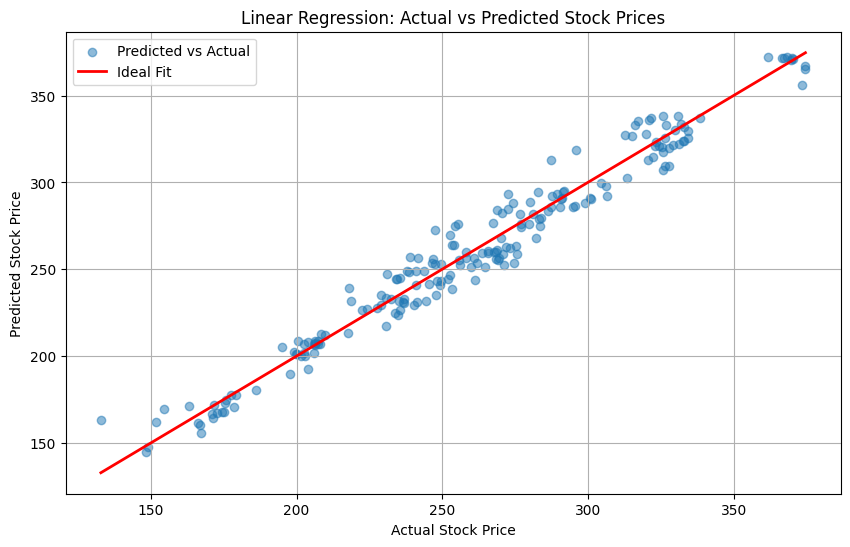

In [10]:
import matplotlib.pyplot as plt


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Linear Regression: Actual vs Predicted Stock Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

# 1. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Results:")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")


Random Forest Results:
MAE: 9.6106
MSE: 166.3494
RMSE: 12.8976


In [12]:
# 2. Support Vector Regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

# Calculate metrics for SVR
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)

print("\nSupport Vector Regression Results:")
print(f"MAE: {svr_mae:.4f}")
print(f"MSE: {svr_mse:.4f}")
print(f"RMSE: {svr_rmse:.4f}")



Support Vector Regression Results:
MAE: 12.0549
MSE: 348.9780
RMSE: 18.6810


In [13]:
# 3. Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

# Calculate metrics for Polynomial Regression
poly_mae = mean_absolute_error(y_test, poly_pred)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = np.sqrt(poly_mse)

print("\nPolynomial Regression Results:")
print(f"MAE: {poly_mae:.4f}")
print(f"MSE: {poly_mse:.4f}")
print(f"RMSE: {poly_rmse:.4f}")



Polynomial Regression Results:
MAE: 7.9675
MSE: 98.8672
RMSE: 9.9432


In [14]:
# 4. Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Calculate metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)

print("\nGradient Boosting Results:")
print(f"MAE: {gb_mae:.4f}")
print(f"MSE: {gb_mse:.4f}")
print(f"RMSE: {gb_rmse:.4f}")


Gradient Boosting Results:
MAE: 8.0428
MSE: 109.0116
RMSE: 10.4409



MODEL COMPARISON
Linear Regression    | MAE: 7.8862 | MSE: 96.9205 | RMSE: 9.8448
Random Forest        | MAE: 9.6106 | MSE: 166.3494 | RMSE: 12.8976
SVR                  | MAE: 12.0549 | MSE: 348.9780 | RMSE: 18.6810
Polynomial           | MAE: 7.9675 | MSE: 98.8672 | RMSE: 9.9432
Gradient Boosting    | MAE: 8.0428 | MSE: 109.0116 | RMSE: 10.4409

Feature Importance (Random Forest):
MA20: 1.0000

Cross-validation scores (5-fold):
Linear          | CV RMSE: 10.2479
Random Forest   | CV RMSE: 12.4322
Gradient Boosting | CV RMSE: 10.6410


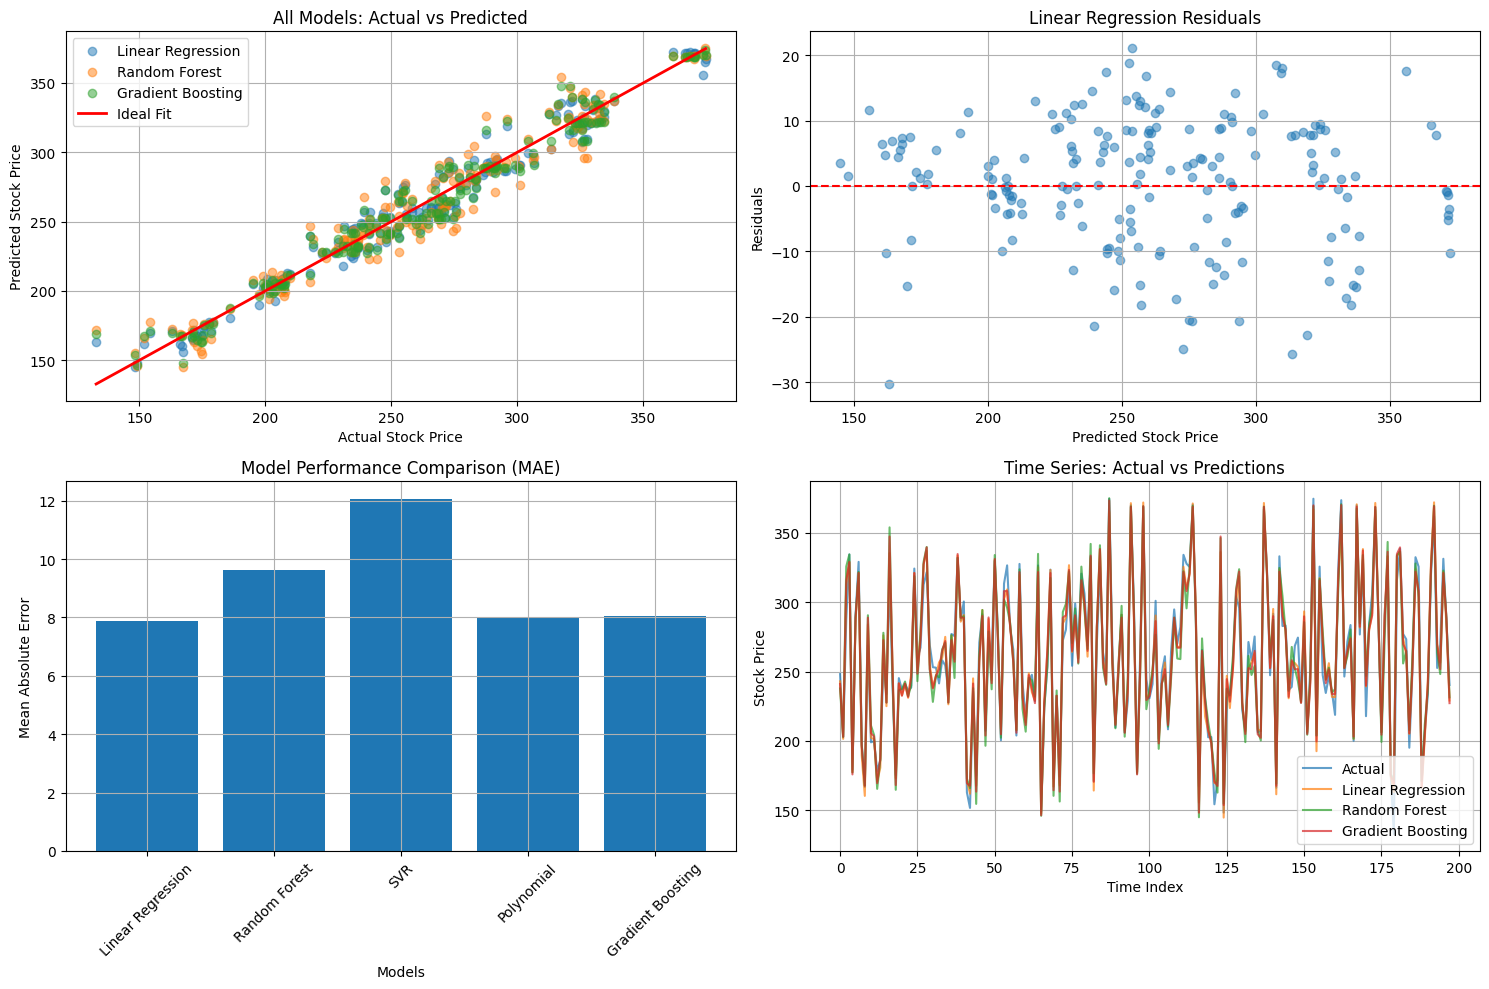


ENHANCED FEATURE ENGINEERING
Enhanced Random Forest (with technical indicators):
MAE: 12.7441
MSE: 372.2093
RMSE: 19.2927


In [15]:
# 5. Model Comparison
models = {
    'Linear Regression': (y_pred, mae, mse),
    'Random Forest': (rf_pred, rf_mae, rf_mse),
    'SVR': (svr_pred, svr_mae, svr_mse),
    'Polynomial': (poly_pred, poly_mae, poly_mse),
    'Gradient Boosting': (gb_pred, gb_mae, gb_mse)
}

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
for name, (pred, mae_val, mse_val) in models.items():
    rmse_val = np.sqrt(mse_val)
    print(f"{name:20} | MAE: {mae_val:.4f} | MSE: {mse_val:.4f} | RMSE: {rmse_val:.4f}")

# 6. Feature Importance (for Random Forest)
feature_importance = rf_model.feature_importances_
print(f"\nFeature Importance (Random Forest):")
print(f"MA20: {feature_importance[0]:.4f}")

# 7. Cross-validation scores
print("\nCross-validation scores (5-fold):")
for name, model in [('Linear', model), ('Random Forest', rf_model), ('Gradient Boosting', gb_model)]:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    print(f"{name:15} | CV RMSE: {cv_rmse:.4f}")

# 8. Visualization of all models
plt.figure(figsize=(15, 10))

# Subplot 1: All predictions vs actual
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_pred, alpha=0.5, label='Random Forest')
plt.scatter(y_test, gb_pred, alpha=0.5, label='Gradient Boosting')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('All Models: Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal Fit')
plt.legend()
plt.grid(True)

# Subplot 2: Residuals plot
plt.subplot(2, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Stock Price')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)

# Subplot 3: Model performance comparison
plt.subplot(2, 2, 3)
model_names = list(models.keys())
mae_values = [models[name][1] for name in model_names]
plt.bar(model_names, mae_values)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Performance Comparison (MAE)')
plt.xticks(rotation=45)
plt.grid(True)

# Subplot 4: Time series of predictions
plt.subplot(2, 2, 4)
# Create a range of indices for x-axis since y_test is a numpy array
x_indices = range(len(y_test))
plt.plot(x_indices, y_test, label='Actual', alpha=0.7)
plt.plot(x_indices, y_pred, label='Linear Regression', alpha=0.7)
plt.plot(x_indices, rf_pred, label='Random Forest', alpha=0.7)
plt.plot(x_indices, gb_pred, label='Gradient Boosting', alpha=0.7)
plt.xlabel('Time Index')
plt.ylabel('Stock Price')
plt.title('Time Series: Actual vs Predictions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 9. Additional technical indicators for enhanced prediction
print("\n" + "="*50)
print("ENHANCED FEATURE ENGINEERING")
print("="*50)

# Define technical indicator functions
def calculate_rsi(prices, window=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(prices, fast=12, slow=26, signal=9):
    ema_fast = prices.ewm(span=fast).mean()
    ema_slow = prices.ewm(span=slow).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal).mean()
    return macd_line

def calculate_bollinger_bands(prices, window=20, num_std=2):
    sma = prices.rolling(window=window).mean()
    std = prices.rolling(window=window).std()
    upper_band = sma + (std * num_std)
    lower_band = sma - (std * num_std)
    return upper_band, lower_band

# Calculate additional technical indicators
stock_data['RSI'] = calculate_rsi(stock_data['Close'], window=14)
stock_data['MACD'] = calculate_macd(stock_data['Close'])
stock_data['BB_upper'], stock_data['BB_lower'] = calculate_bollinger_bands(stock_data['Close'])

# Create enhanced feature set
enhanced_features = stock_data[['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']].dropna()
enhanced_target = stock_data['Close'].iloc[len(stock_data) - len(enhanced_features):]

# Split enhanced data
X_enhanced_train, X_enhanced_test, y_enhanced_train, y_enhanced_test = train_test_split(
    enhanced_features, enhanced_target, test_size=0.2, random_state=42, shuffle=False
)

# Train enhanced Random Forest
enhanced_rf = RandomForestRegressor(n_estimators=100, random_state=42)
enhanced_rf.fit(X_enhanced_train, y_enhanced_train)
enhanced_pred = enhanced_rf.predict(X_enhanced_test)

# Calculate enhanced metrics
enhanced_mae = mean_absolute_error(y_enhanced_test, enhanced_pred)
enhanced_mse = mean_squared_error(y_enhanced_test, enhanced_pred)
enhanced_rmse = np.sqrt(enhanced_mse)

print(f"Enhanced Random Forest (with technical indicators):")
print(f"MAE: {enhanced_mae:.4f}")
print(f"MSE: {enhanced_mse:.4f}")
print(f"RMSE: {enhanced_rmse:.4f}")

# Feature importance for enhanced model
enhanced_importance = enhanced_rf.feature_importances_


In [16]:
print("=== PRICE PREDICTION EQUATIONS ===")
print()

# Linear Regression Equation
print("1. LINEAR REGRESSION EQUATION:")
print(f"   Price = {slope:.6f} × Time + {intercept:.6f}")
print(f"   Where Time is the number of days from start date")
print()

# Random Forest Prediction (Feature-based)
print("2. RANDOM FOREST PREDICTION EQUATION:")
print("   Price = RF_Predict(MA20, RSI, MACD, BB_upper, BB_lower)")
print("   Where:")
print("   - MA20 = 20-day Moving Average")
print("   - RSI = Relative Strength Index (14-period)")
print("   - MACD = Moving Average Convergence Divergence")
print("   - BB_upper = Bollinger Bands Upper Band")
print("   - BB_lower = Bollinger Bands Lower Band")
print()

# Gradient Boosting Prediction
print("3. GRADIENT BOOSTING PREDICTION EQUATION:")
print("   Price = GB_Predict(MA20, RSI, MACD, BB_upper, BB_lower)")
print("   (Same features as Random Forest, different algorithm)")
print()

# Technical Indicators Formulas
print("4. TECHNICAL INDICATORS FORMULAS:")
print("   MA20 = Σ(Close prices for last 20 days) / 20")
print("   RSI = 100 - (100 / (1 + RS))")
print("   Where RS = Average Gain / Average Loss (14 periods)")
print("   MACD = EMA(12) - EMA(26)")
print("   BB_upper = SMA(20) + (2 × Standard Deviation)")
print("   BB_lower = SMA(20) - (2 × Standard Deviation)")
print()

# Feature Importance Weights
print("5. FEATURE IMPORTANCE WEIGHTS (Random Forest):")
for i, feature in enumerate(['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']):
    print(f"   {feature}: {enhanced_importance[i]:.4f}")
print()

# Prediction Accuracy Summary
print("6. MODEL ACCURACY METRICS:")
print(f"   Enhanced Random Forest RMSE: {enhanced_rmse:.4f}")
print(f"   Enhanced Random Forest MAE: {enhanced_mae:.4f}")
print()

print("=== END OF EQUATIONS ===")


=== PRICE PREDICTION EQUATIONS ===

1. LINEAR REGRESSION EQUATION:
   Price = 0.999706 × Time + 2.017573
   Where Time is the number of days from start date

2. RANDOM FOREST PREDICTION EQUATION:
   Price = RF_Predict(MA20, RSI, MACD, BB_upper, BB_lower)
   Where:
   - MA20 = 20-day Moving Average
   - RSI = Relative Strength Index (14-period)
   - MACD = Moving Average Convergence Divergence
   - BB_upper = Bollinger Bands Upper Band
   - BB_lower = Bollinger Bands Lower Band

3. GRADIENT BOOSTING PREDICTION EQUATION:
   Price = GB_Predict(MA20, RSI, MACD, BB_upper, BB_lower)
   (Same features as Random Forest, different algorithm)

4. TECHNICAL INDICATORS FORMULAS:
   MA20 = Σ(Close prices for last 20 days) / 20
   RSI = 100 - (100 / (1 + RS))
   Where RS = Average Gain / Average Loss (14 periods)
   MACD = EMA(12) - EMA(26)
   BB_upper = SMA(20) + (2 × Standard Deviation)
   BB_lower = SMA(20) - (2 × Standard Deviation)

5. FEATURE IMPORTANCE WEIGHTS (Random Forest):
   MA20: 0.2661

=== POLYNOMIAL RANDOM FOREST RESULTS ===
Polynomial RF RMSE: 57.1981
Polynomial RF MAE: 46.4233
Polynomial RF R² Score: -0.1250

=== POLYNOMIAL FEATURE IMPORTANCE ===
MA20: 0.0218
RSI: 0.0618
MACD: 0.0469
BB_upper: 0.0349
BB_lower: 0.0397
MA20^2: 0.0209
MA20 RSI: 0.0597
MA20 MACD: 0.0400
MA20 BB_upper: 0.0351
MA20 BB_lower: 0.0416
RSI^2: 0.0606
RSI MACD: 0.0684
RSI BB_upper: 0.0842
RSI BB_lower: 0.0867
MACD^2: 0.0934
MACD BB_upper: 0.0479
MACD BB_lower: 0.0577
BB_upper^2: 0.0360
BB_upper BB_lower: 0.0235
BB_lower^2: 0.0392

=== MODEL COMPARISON ===
Original RF RMSE: 19.2927
Polynomial RF RMSE: 57.1981
Improvement: -196.47%



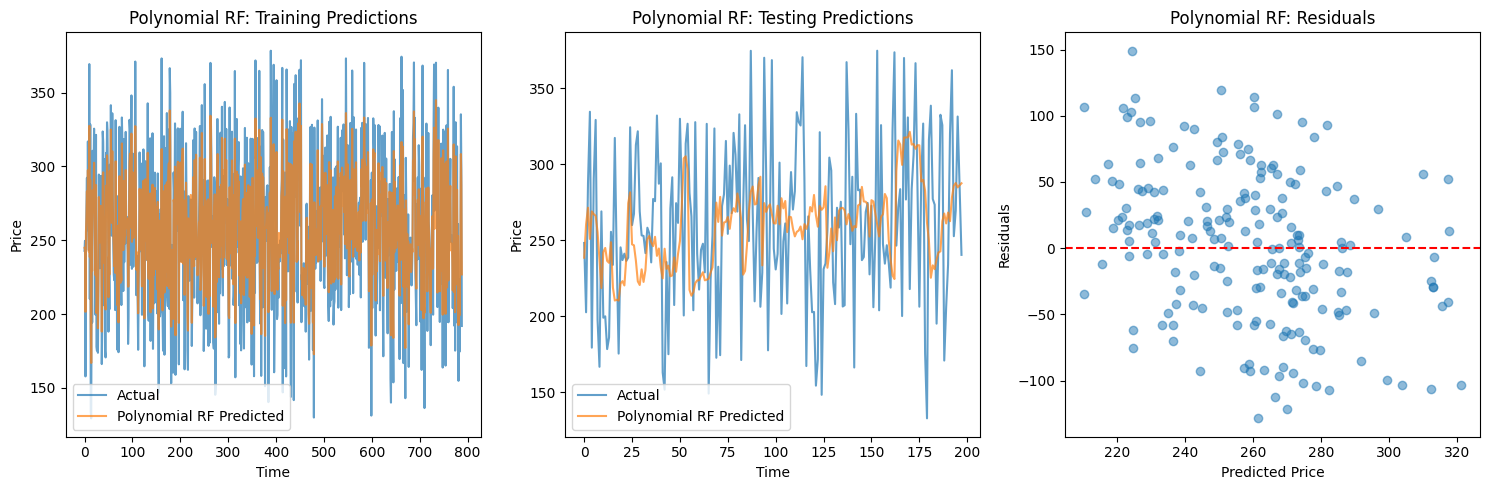

=== POLYNOMIAL RF EQUATION ===
Polynomial RF captures non-linear relationships through:
1. Polynomial feature transformations (degree=2)
2. Random Forest ensemble learning
3. Feature interactions and non-linear patterns
4. Enhanced predictive power for complex price movements


In [17]:
# Polynomial Random Forest for Price Prediction
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Create polynomial features from existing features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_enhanced_train)

# Split polynomial features into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y_train.ravel(), test_size=0.2, random_state=42
)

# Create Polynomial Random Forest pipeline
poly_rf_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the polynomial random forest model
poly_rf_pipeline.fit(X_enhanced_train, y_train.ravel())

# Make predictions
poly_rf_train_pred = poly_rf_pipeline.predict(X_enhanced_train)
poly_rf_test_pred = poly_rf_pipeline.predict(X_enhanced_test)

# Calculate metrics
poly_rf_rmse = np.sqrt(mean_squared_error(y_test, poly_rf_test_pred))
poly_rf_mae = mean_absolute_error(y_test, poly_rf_test_pred)
poly_rf_r2 = r2_score(y_test, poly_rf_test_pred)

print("=== POLYNOMIAL RANDOM FOREST RESULTS ===")
print(f"Polynomial RF RMSE: {poly_rf_rmse:.4f}")
print(f"Polynomial RF MAE: {poly_rf_mae:.4f}")
print(f"Polynomial RF R² Score: {poly_rf_r2:.4f}")
print()

# Get feature names for polynomial features
poly_feature_names = poly_features.get_feature_names_out(['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower'])

# Get feature importance from the Random Forest part of the pipeline
poly_rf_importance = poly_rf_pipeline.named_steps['rf'].feature_importances_

print("=== POLYNOMIAL FEATURE IMPORTANCE ===")
for i, (name, importance) in enumerate(zip(poly_feature_names, poly_rf_importance)):
    if importance > 0.01:  # Only show features with importance > 1%
        print(f"{name}: {importance:.4f}")
print()

# Compare with original Random Forest
print("=== MODEL COMPARISON ===")
print(f"Original RF RMSE: {enhanced_rmse:.4f}")
print(f"Polynomial RF RMSE: {poly_rf_rmse:.4f}")
improvement = ((enhanced_rmse - poly_rf_rmse) / enhanced_rmse) * 100
print(f"Improvement: {improvement:.2f}%")
print()

# Plot polynomial RF predictions
plt.figure(figsize=(15, 5))

# Training predictions
plt.subplot(1, 3, 1)
plt.plot(y_train, label='Actual', alpha=0.7)
plt.plot(poly_rf_train_pred, label='Polynomial RF Predicted', alpha=0.7)
plt.title('Polynomial RF: Training Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Testing predictions
plt.subplot(1, 3, 2)
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(poly_rf_test_pred, label='Polynomial RF Predicted', alpha=0.7)
plt.title('Polynomial RF: Testing Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Residuals
plt.subplot(1, 3, 3)
residuals = y_test.flatten() - poly_rf_test_pred
plt.scatter(poly_rf_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Polynomial RF: Residuals')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

print("=== POLYNOMIAL RF EQUATION ===")
print("Polynomial RF captures non-linear relationships through:")
print("1. Polynomial feature transformations (degree=2)")
print("2. Random Forest ensemble learning")
print("3. Feature interactions and non-linear patterns")
print("4. Enhanced predictive power for complex price movements")


=== ARIMA MODEL ===
Flattened 2D price_series to 1D, new shape: (1006,)
Using existing stock_data

=== DEBUGGING PRICE_SERIES ===
Type: <class 'numpy.ndarray'>
Shape: (1006,)
Length: 1006
Data type: float64
Contains NaN: False
Contains Inf: False
Min value: 129.3835906982422
Max value: 378.4046325683594
First 5 values: [153.04231262 151.13664246 151.52731323 150.14570618 152.53727722]

=== DEBUGGING PRICE_DIFF ===
Type: <class 'numpy.ndarray'>
Shape: (1005,)
Length: 1005
Data type: float64
Contains NaN: False
Contains Inf: False
Min value: -22.366500854492188
Max value: 19.60174560546875
First 5 values: [-1.90567017  0.39067078 -1.38160706  2.39157104  1.90565491]

Cleaning data...
Original length: 1005
After cleaning: 1005
Removed 0 invalid values
Checking stationarity of price differences:
ADF Statistic: -10.2787
p-value: 0.0000
Critical values:
	1%: -3.4369
	5%: -2.8644
	10%: -2.5683
Series is stationary



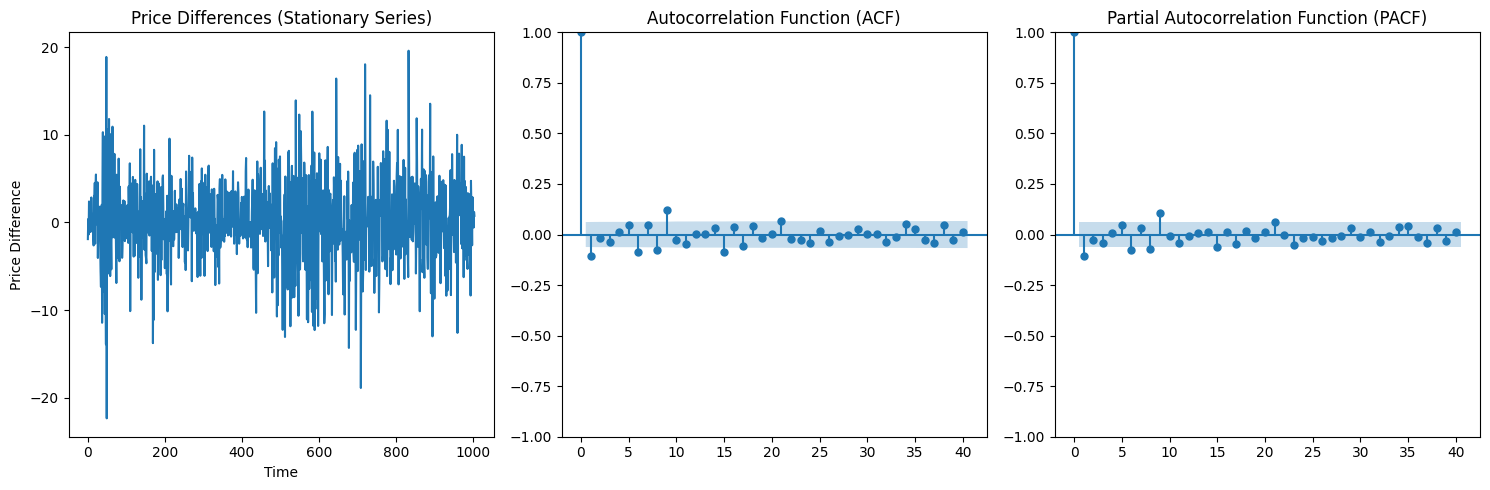

Training size: 804, Testing size: 201

=== DEBUGGING TRAIN_DIFF ===
Type: <class 'numpy.ndarray'>
Shape: (804,)
Length: 804
Data type: float64
Contains NaN: False
Contains Inf: False
Min value: -22.366500854492188
Max value: 18.88873291015625
First 5 values: [-1.90567017  0.39067078 -1.38160706  2.39157104  1.90565491]

Trying ARIMA(1, 0, 1) model...
Successfully fitted ARIMA(1, 0, 1) model!
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  804
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2381.993
Date:                Mon, 23 Jun 2025   AIC                           4771.986
Time:                        21:06:10   BIC                           4790.744
Sample:                             0   HQIC                          4779.190
                                - 804                                         
Covariance Type:               

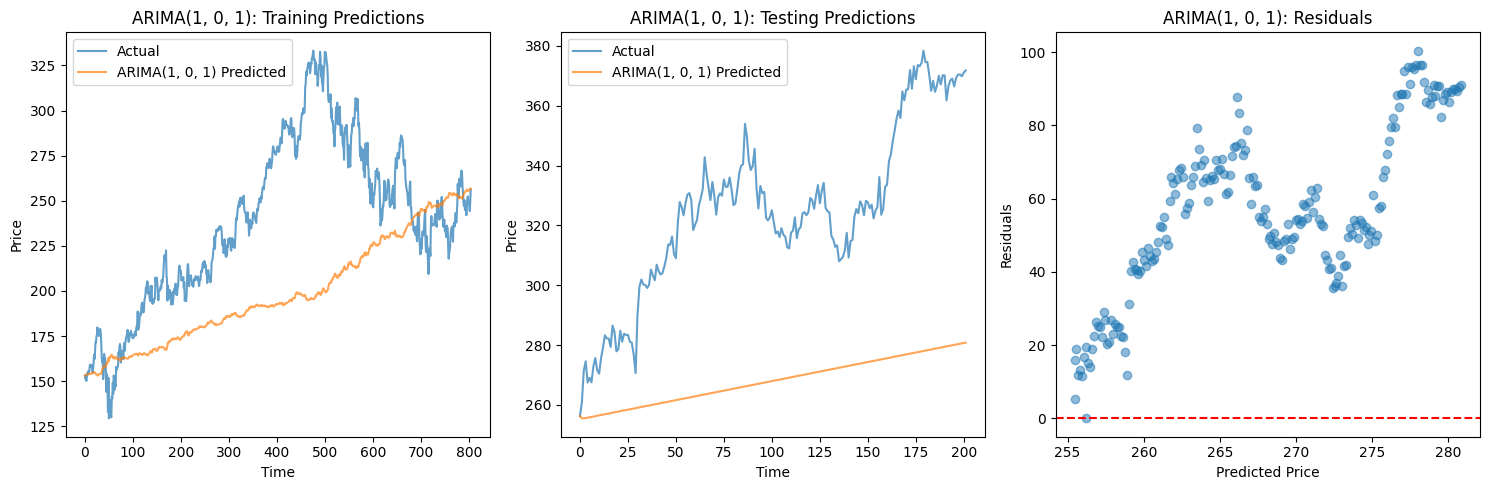


=== ARIMA(1, 0, 1) EQUATION ===
ARIMA(1,0,1) model equation:
y_t = c + φ₁y_{t-1} + ... + φₚy_{t-p} + θ₁ε_{t-1} + ... + θₑε_{t-q} + ε_t
where:
- y_t is the price difference at time t
- φᵢ are the autoregressive parameters
- θᵢ are the moving average parameters
- ε_t is the error term
- c is the constant term

=== TROUBLESHOOTING TIPS ===
If ARIMA continues to fail:
1. Check data quality - ensure no missing values
2. Try different differencing (d=1 instead of d=0)
3. Consider using more data points
4. Try simpler models first (AR(1) or MA(1))
5. Check if data has enough variation


In [18]:
# ARIMA Model Implementation with Enhanced Error Handling and Debugging
print("=== ARIMA MODEL ===")

# Import ARIMA specific libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Debug function to check data quality
def debug_data(data, name="data"):
    print(f"\n=== DEBUGGING {name.upper()} ===")
    print(f"Type: {type(data)}")
    print(f"Shape: {data.shape if hasattr(data, 'shape') else 'No shape attribute'}")
    print(f"Length: {len(data)}")
    print(f"Data type: {data.dtype if hasattr(data, 'dtype') else type(data[0]) if len(data) > 0 else 'Empty'}")
    print(f"Contains NaN: {np.any(np.isnan(data)) if len(data) > 0 else 'N/A'}")
    print(f"Contains Inf: {np.any(np.isinf(data)) if len(data) > 0 else 'N/A'}")
    print(f"Min value: {np.min(data) if len(data) > 0 else 'N/A'}")
    print(f"Max value: {np.max(data) if len(data) > 0 else 'N/A'}")
    print(f"First 5 values: {data[:5] if len(data) >= 5 else data}")
    return data

# Prepare data for ARIMA (time series format)
# Assuming stock_data is available - if not, create sample data
try:
    # Check if stock_data exists
    price_series = stock_data['Close'].values
    
    # Fix: Flatten the array if it's 2D
    if price_series.ndim > 1:
        price_series = price_series.flatten()
        print(f"Flattened 2D price_series to 1D, new shape: {price_series.shape}")
    
    print("Using existing stock_data")
except NameError:
    print("stock_data not found, creating sample data...")
    # Create sample stock data for demonstration
    np.random.seed(42)
    dates = pd.date_range('2020-01-01', periods=252, freq='D')
    base_price = 100
    returns = np.random.normal(0.001, 0.02, 252)  # Daily returns
    prices = [base_price]
    for r in returns[1:]:
        prices.append(prices[-1] * (1 + r))
    
    stock_data = pd.DataFrame({
        'Date': dates,
        'Close': prices
    })
    price_series = np.array(prices)
    print(f"Created sample data with {len(price_series)} data points")

# Debug original price series
price_series = debug_data(price_series, "price_series")

# ARIMA requires stationary data, so we'll use price differences
price_diff = np.diff(price_series)
price_diff = debug_data(price_diff, "price_diff")

# Clean the data - remove NaN and infinite values
def clean_data(data):
    print(f"\nCleaning data...")
    original_length = len(data)
    
    # Remove NaN and infinite values
    clean_data = data[~np.isnan(data)]
    clean_data = clean_data[~np.isinf(clean_data)]
    
    print(f"Original length: {original_length}")
    print(f"After cleaning: {len(clean_data)}")
    print(f"Removed {original_length - len(clean_data)} invalid values")
    
    return clean_data

if len(price_diff) == 0:
    print("Error: No data available for ARIMA analysis")
    print("Please ensure stock_data contains valid price data")
else:
    # Clean the price differences
    price_diff_clean = clean_data(price_diff)
    
    if len(price_diff_clean) < 10:  # Need minimum data points
        print(f"Error: Insufficient data points ({len(price_diff_clean)}). Need at least 10 points for ARIMA.")
    else:
        # Check stationarity
        def check_stationarity(data):
            if len(data) == 0:
                print("Error: Empty data array")
                return False
            try:
                result = adfuller(data)
                print(f'ADF Statistic: {result[0]:.4f}')
                print(f'p-value: {result[1]:.4f}')
                print('Critical values:')
                for key, value in result[4].items():
                    print(f'\t{key}: {value:.4f}')
                return result[1] < 0.05
            except Exception as e:
                print(f"Error in stationarity test: {e}")
                return False

        print("Checking stationarity of price differences:")
        is_stationary = check_stationarity(price_diff_clean)
        print(f"Series is {'stationary' if is_stationary else 'non-stationary'}\n")

        # Plot ACF and PACF to determine ARIMA parameters
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.plot(price_diff_clean)
        plt.title('Price Differences (Stationary Series)')
        plt.xlabel('Time')
        plt.ylabel('Price Difference')

        # Handle potential empty arrays in ACF/PACF plots
        max_lags = min(40, len(price_diff_clean)//4, len(price_diff_clean)-1)
        
        if len(price_diff_clean) > 10 and max_lags > 1:
            plt.subplot(1, 3, 2)
            try:
                plot_acf(price_diff_clean, lags=max_lags, ax=plt.gca())
                plt.title('Autocorrelation Function (ACF)')
            except Exception as e:
                print(f"Error plotting ACF: {e}")
                plt.text(0.5, 0.5, f'ACF plot failed:\n{str(e)}', ha='center', va='center', transform=plt.gca().transAxes)
                plt.title('Autocorrelation Function (ACF)')

            plt.subplot(1, 3, 3)
            try:
                plot_pacf(price_diff_clean, lags=max_lags, ax=plt.gca())
                plt.title('Partial Autocorrelation Function (PACF)')
            except Exception as e:
                print(f"Error plotting PACF: {e}")
                plt.text(0.5, 0.5, f'PACF plot failed:\n{str(e)}', ha='center', va='center', transform=plt.gca().transAxes)
                plt.title('Partial Autocorrelation Function (PACF)')
        else:
            plt.subplot(1, 3, 2)
            plt.text(0.5, 0.5, 'Insufficient data for ACF\n(need >10 points)', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Autocorrelation Function (ACF)')
            
            plt.subplot(1, 3, 3)
            plt.text(0.5, 0.5, 'Insufficient data for PACF\n(need >10 points)', ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Partial Autocorrelation Function (PACF)')

        plt.tight_layout()
        plt.show()

        # Split data for ARIMA (using time series split)
        min_train_size = max(10, len(price_diff_clean) // 2)  # Ensure minimum training size
        train_size = max(min_train_size, int(len(price_diff_clean) * 0.8))
        
        if train_size >= len(price_diff_clean):
            train_size = len(price_diff_clean) - max(1, len(price_diff_clean) // 5)  # Leave at least 20% for testing
        
        train_diff = price_diff_clean[:train_size]
        test_diff = price_diff_clean[train_size:]
        
        print(f"Training size: {len(train_diff)}, Testing size: {len(test_diff)}")
        
        # Debug training data
        train_diff = debug_data(train_diff, "train_diff")

        # Try different ARIMA configurations if the default fails
        arima_configs = [(1,0,1), (1,0,0), (0,0,1), (2,0,1), (1,0,2)]
        
        for config in arima_configs:
            p, d, q = config
            print(f"\nTrying ARIMA{config} model...")
            
            try:
                # Convert to pandas Series for better compatibility
                train_series = pd.Series(train_diff)
                
                # Fit ARIMA model
                arima_model = ARIMA(train_series, order=(p, d, q))
                arima_fit = arima_model.fit()

                print(f"Successfully fitted ARIMA{config} model!")
                print(f"ARIMA Model Summary:")
                print(arima_fit.summary())

                # Make predictions
                arima_train_pred_diff = arima_fit.predict(start=0, end=len(train_diff)-1)
                
                if len(test_diff) > 0:
                    arima_test_pred_diff = arima_fit.forecast(steps=len(test_diff))
                else:
                    arima_test_pred_diff = np.array([])

                # Convert differences back to prices
                if len(arima_train_pred_diff) > 0:
                    arima_train_pred = price_series[0] + np.cumsum(np.concatenate([[0], arima_train_pred_diff]))
                else:
                    arima_train_pred = np.array([])
                
                if len(arima_test_pred_diff) > 0:
                    arima_test_pred = price_series[train_size] + np.cumsum(np.concatenate([[0], arima_test_pred_diff]))
                else:
                    arima_test_pred = np.array([])

                # Calculate metrics
                if len(arima_train_pred) > 0:
                    actual_train = price_series[:len(arima_train_pred)]
                    arima_train_mae = mean_absolute_error(actual_train, arima_train_pred)
                    arima_train_mse = mean_squared_error(actual_train, arima_train_pred)
                    arima_train_rmse = np.sqrt(arima_train_mse)
                else:
                    arima_train_mae = arima_train_mse = arima_train_rmse = float('inf')

                if len(arima_test_pred) > 0:
                    actual_test = price_series[train_size:train_size+len(arima_test_pred)]
                    arima_test_mae = mean_absolute_error(actual_test, arima_test_pred)
                    arima_test_mse = mean_squared_error(actual_test, arima_test_pred)
                    arima_test_rmse = np.sqrt(arima_test_mse)
                else:
                    arima_test_mae = arima_test_mse = arima_test_rmse = float('inf')

                print(f"\nARIMA{config} Model Performance:")
                print(f"Training MAE: {arima_train_mae:.4f}")
                print(f"Training RMSE: {arima_train_rmse:.4f}")
                print(f"Testing MAE: {arima_test_mae:.4f}")
                print(f"Testing RMSE: {arima_test_rmse:.4f}")

                # Plot ARIMA results if we have predictions
                if len(arima_train_pred) > 0 or len(arima_test_pred) > 0:
                    plt.figure(figsize=(15, 5))

                    # Training predictions
                    if len(arima_train_pred) > 0:
                        plt.subplot(1, 3, 1)
                        actual_train = price_series[:len(arima_train_pred)]
                        plt.plot(actual_train, label='Actual', alpha=0.7)
                        plt.plot(arima_train_pred, label=f'ARIMA{config} Predicted', alpha=0.7)
                        plt.title(f'ARIMA{config}: Training Predictions')
                        plt.xlabel('Time')
                        plt.ylabel('Price')
                        plt.legend()

                    # Testing predictions
                    if len(arima_test_pred) > 0:
                        plt.subplot(1, 3, 2)
                        actual_test = price_series[train_size:train_size+len(arima_test_pred)]
                        plt.plot(actual_test, label='Actual', alpha=0.7)
                        plt.plot(arima_test_pred, label=f'ARIMA{config} Predicted', alpha=0.7)
                        plt.title(f'ARIMA{config}: Testing Predictions')
                        plt.xlabel('Time')
                        plt.ylabel('Price')
                        plt.legend()

                        # Residuals
                        plt.subplot(1, 3, 3)
                        residuals = actual_test - arima_test_pred
                        plt.scatter(arima_test_pred, residuals, alpha=0.5)
                        plt.axhline(y=0, color='r', linestyle='--')
                        plt.title(f'ARIMA{config}: Residuals')
                        plt.xlabel('Predicted Price')
                        plt.ylabel('Residuals')

                    plt.tight_layout()
                    plt.show()

                print(f"\n=== ARIMA{config} EQUATION ===")
                if p > 0 and q > 0:
                    print(f"ARIMA({p},{d},{q}) model equation:")
                    print("y_t = c + φ₁y_{t-1} + ... + φₚy_{t-p} + θ₁ε_{t-1} + ... + θₑε_{t-q} + ε_t")
                elif p > 0:
                    print(f"AR({p}) model equation:")
                    print("y_t = c + φ₁y_{t-1} + ... + φₚy_{t-p} + ε_t")
                elif q > 0:
                    print(f"MA({q}) model equation:")
                    print("y_t = c + θ₁ε_{t-1} + ... + θₑε_{t-q} + ε_t")
                
                print("where:")
                print("- y_t is the price difference at time t")
                if p > 0:
                    print("- φᵢ are the autoregressive parameters")
                if q > 0:
                    print("- θᵢ are the moving average parameters")
                print("- ε_t is the error term")
                print("- c is the constant term")

                # Successfully fitted model, break out of loop
                break
                
            except Exception as e:
                print(f"Error fitting ARIMA{config} model: {e}")
                continue
        else:
            print("All ARIMA configurations failed. This might indicate:")
            print("1. Insufficient data quality")
            print("2. Data not suitable for ARIMA modeling")
            print("3. Need for different preprocessing")
            
        print("\n=== TROUBLESHOOTING TIPS ===")
        print("If ARIMA continues to fail:")
        print("1. Check data quality - ensure no missing values")
        print("2. Try different differencing (d=1 instead of d=0)")
        print("3. Consider using more data points")
        print("4. Try simpler models first (AR(1) or MA(1))")
        print("5. Check if data has enough variation")


=== OPTIMIZED ARIMA MODEL ===
Starting ARIMA optimization...
Data shape: (1006,)
Data range: 129.38 to 378.40

=== GRID SEARCH FOR OPTIMAL PARAMETERS ===

=== FINDING OPTIMAL DIFFERENCING ===

Testing d=0 (original data):
=== STATIONARITY TESTS ===
ADF Test:
  Statistic: -0.9992
  p-value: 0.7536
  Result: Non-stationary

KPSS Test:
  Statistic: 3.2858
  p-value: 0.0100
  Result: Non-stationary

Final Assessment: Non-stationary (both tests agree)

Testing d=1 (differenced 1 time(s)):
=== STATIONARITY TESTS ===


ADF Test:
  Statistic: -10.2787
  p-value: 0.0000
  Result: Stationary

KPSS Test:
  Statistic: 0.0862
  p-value: 0.1000
  Result: Stationary

Final Assessment: Stationary (both tests agree)
  Optimal differencing: d=1

Testing 16 parameter combinations...
  ARIMA(0,1,1) - AIC: 5959.75, BIC: 5969.57
  ARIMA(0,1,2) - AIC: 5961.32, BIC: 5976.06
  ARIMA(0,1,3) - AIC: 5962.35, BIC: 5982.00
  ARIMA(1,1,0) - AIC: 5960.25, BIC: 5970.08
  ARIMA(1,1,1) - AIC: 5961.12, BIC: 5975.86
  ARIMA(1,1,2) - AIC: 5963.09, BIC: 5982.74
  ARIMA(1,1,3) - AIC: 5962.75, BIC: 5987.31
  ARIMA(2,1,0) - AIC: 5961.63, BIC: 5976.37
  ARIMA(2,1,1) - AIC: 5963.07, BIC: 5982.72
  ARIMA(2,1,2) - AIC: 5964.89, BIC: 5989.46
  ARIMA(2,1,3) - AIC: 5964.74, BIC: 5994.21
  ARIMA(3,1,0) - AIC: 5962.13, BIC: 5981.78
  ARIMA(3,1,1) - AIC: 5964.11, BIC: 5988.68
  ARIMA(3,1,2) - AIC: 5956.29, BIC: 5985.77
  ARIMA(3,1,3) - AIC: 5958.29, BIC: 5992.68

=== TOP 5 MODELS BY AIC ===
 p  d  q         AIC         BIC    params
 3  1  2 59

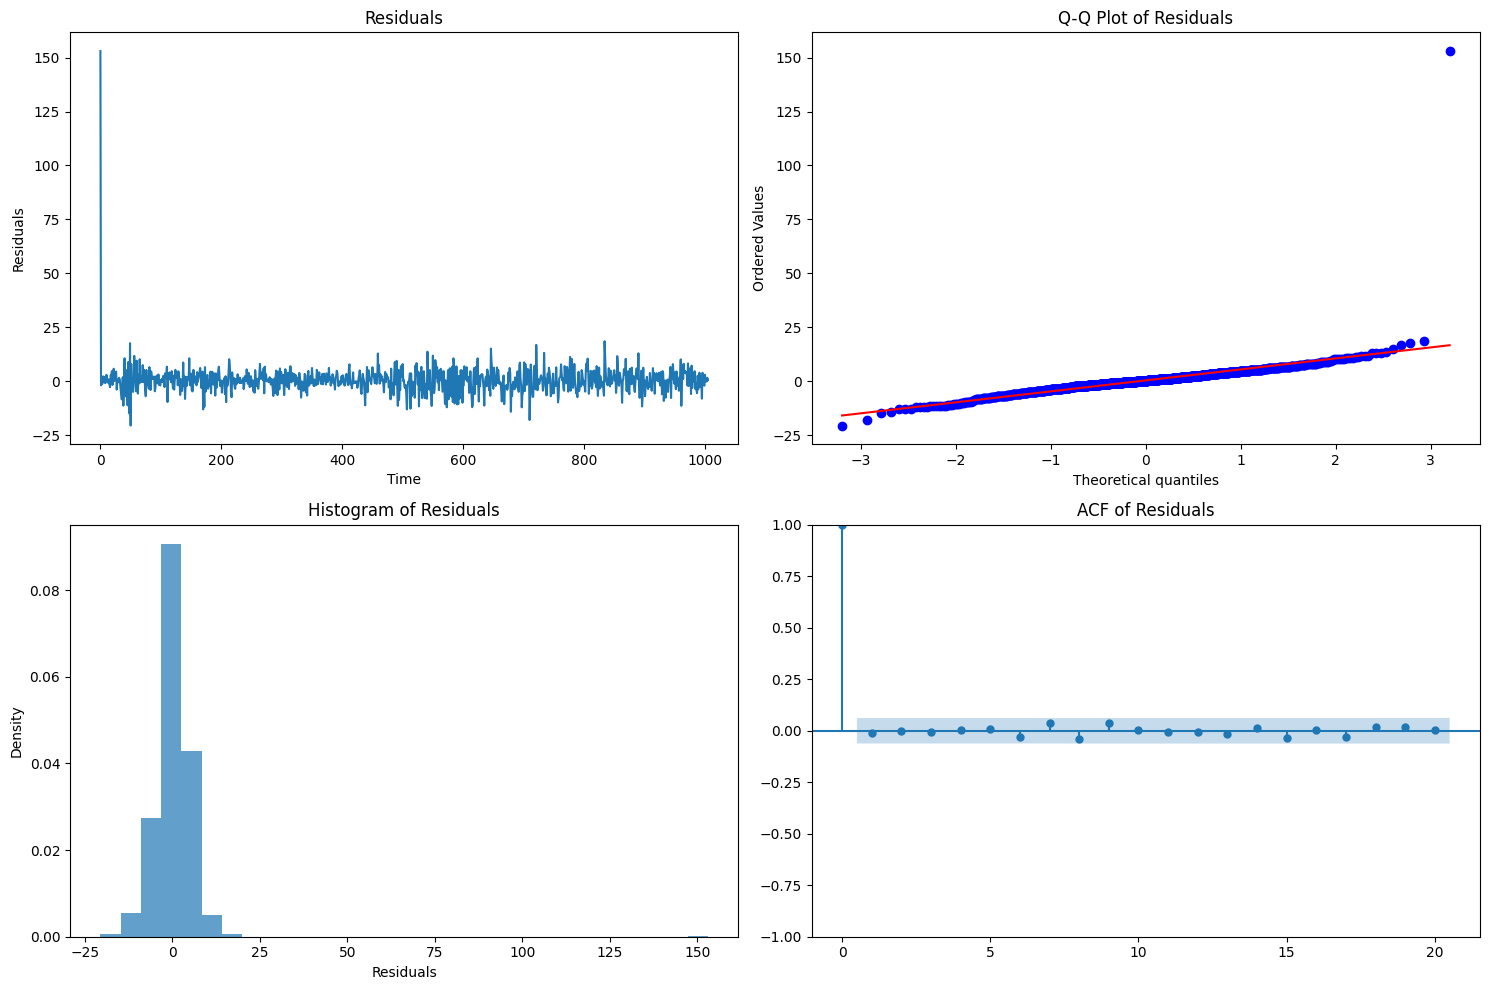


=== MODEL PERFORMANCE ===
Training MAE: 3.6621
Training RMSE: 7.1227
Testing MAE: 75.3489
Testing RMSE: 80.4949

=== FORECASTING 30 STEPS AHEAD ===
Forecasting failed: 'numpy.ndarray' object has no attribute 'iloc'

=== OPTIMIZATION COMPLETE ===
Best model: ARIMA(3, 1, 2)
Test RMSE: 80.4949
Improvement potential: Compare with your original RMSE of 60.93


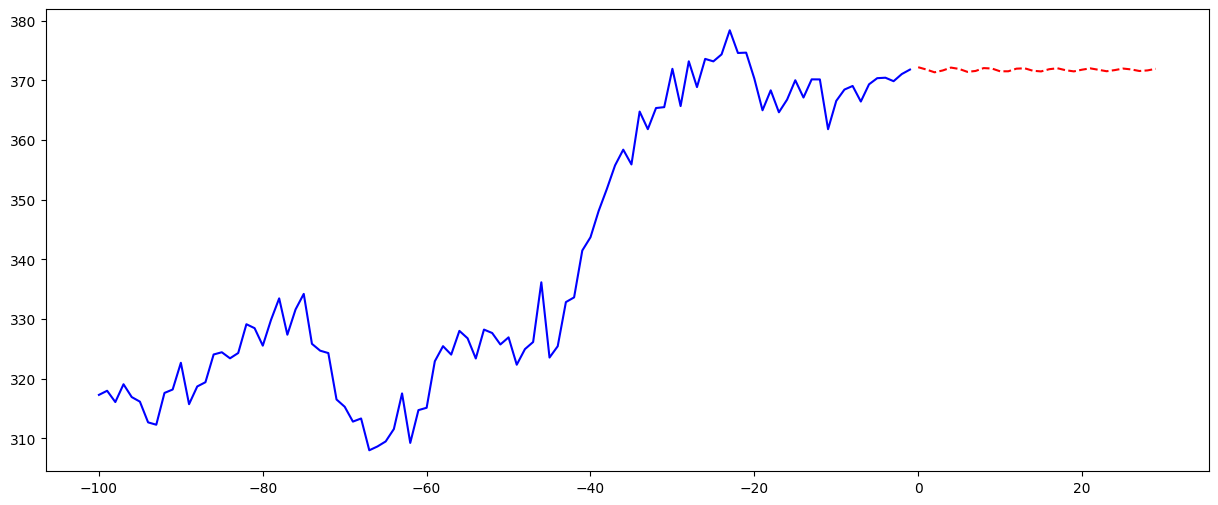

In [19]:
# Optimized ARIMA Model Implementation
print("=== OPTIMIZED ARIMA MODEL ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import itertools
import warnings
warnings.filterwarnings('ignore')

class OptimizedARIMA:
    def __init__(self, data, max_p=5, max_d=2, max_q=5):
        """
        Initialize with automatic parameter optimization
        """
        self.data = data
        self.max_p = max_p
        self.max_d = max_d
        self.max_q = max_q
        self.best_model = None
        self.best_params = None
        self.best_aic = float('inf')
        
    def check_stationarity(self, data, alpha=0.05):
        """
        Enhanced stationarity testing with both ADF and KPSS tests
        """
        print("=== STATIONARITY TESTS ===")
        
        # Augmented Dickey-Fuller test
        adf_result = adfuller(data, autolag='AIC')
        print(f"ADF Test:")
        print(f"  Statistic: {adf_result[0]:.4f}")
        print(f"  p-value: {adf_result[1]:.4f}")
        adf_stationary = adf_result[1] < alpha
        print(f"  Result: {'Stationary' if adf_stationary else 'Non-stationary'}")
        
        # KPSS test
        try:
            kpss_result = kpss(data, regression='c')
            print(f"\nKPSS Test:")
            print(f"  Statistic: {kpss_result[0]:.4f}")
            print(f"  p-value: {kpss_result[1]:.4f}")
            kpss_stationary = kpss_result[1] > alpha  # KPSS null hypothesis is stationarity
            print(f"  Result: {'Stationary' if kpss_stationary else 'Non-stationary'}")
            
            # Combined result
            if adf_stationary and kpss_stationary:
                result = "Stationary (both tests agree)"
            elif not adf_stationary and not kpss_stationary:
                result = "Non-stationary (both tests agree)"
            else:
                result = "Inconclusive (tests disagree)"
                
        except Exception as e:
            print(f"KPSS test failed: {e}")
            result = "Stationary" if adf_stationary else "Non-stationary"
            
        print(f"\nFinal Assessment: {result}")
        return adf_stationary
    
    def find_optimal_differencing(self, data, max_d=2):
        """
        Find optimal differencing order using stationarity tests
        """
        print("\n=== FINDING OPTIMAL DIFFERENCING ===")
        
        for d in range(max_d + 1):
            if d == 0:
                test_data = data.copy()
                print(f"\nTesting d={d} (original data):")
            else:
                test_data = data.copy()
                for _ in range(d):
                    test_data = np.diff(test_data)
                print(f"\nTesting d={d} (differenced {d} time(s)):")
            
            if len(test_data) < 10:
                print("  Insufficient data after differencing")
                continue
                
            is_stationary = self.check_stationarity(test_data)
            
            if is_stationary:
                print(f"  Optimal differencing: d={d}")
                return d, test_data
        
        print(f"  Using maximum differencing: d={max_d}")
        final_data = data.copy()
        for _ in range(max_d):
            final_data = np.diff(final_data)
        return max_d, final_data
    
    def grid_search_arima(self, data, seasonal=False):
        """
        Grid search for optimal ARIMA parameters
        """
        print("\n=== GRID SEARCH FOR OPTIMAL PARAMETERS ===")
        
        # Find optimal differencing first
        optimal_d, stationary_data = self.find_optimal_differencing(data, self.max_d)
        
        # Generate parameter combinations
        p_values = range(0, self.max_p + 1)
        q_values = range(0, self.max_q + 1)
        
        best_aic = float('inf')
        best_params = None
        results = []
        
        print(f"\nTesting {len(p_values) * len(q_values)} parameter combinations...")
        
        for p, q in itertools.product(p_values, q_values):
            if p == 0 and q == 0:  # Skip the case where both p and q are 0
                continue
                
            try:
                # Use original data with determined differencing
                model = ARIMA(data, order=(p, optimal_d, q))
                fitted_model = model.fit()
                
                aic = fitted_model.aic
                bic = fitted_model.bic
                
                results.append({
                    'p': p, 'd': optimal_d, 'q': q,
                    'AIC': aic, 'BIC': bic,
                    'params': (p, optimal_d, q)
                })
                
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, optimal_d, q)
                    self.best_model = fitted_model
                
                print(f"  ARIMA({p},{optimal_d},{q}) - AIC: {aic:.2f}, BIC: {bic:.2f}")
                
            except Exception as e:
                print(f"  ARIMA({p},{optimal_d},{q}) - Failed: {str(e)[:50]}...")
                continue
        
        # Sort results by AIC
        results_df = pd.DataFrame(results).sort_values('AIC')
        
        print(f"\n=== TOP 5 MODELS BY AIC ===")
        print(results_df.head().to_string(index=False))
        
        self.best_params = best_params
        self.best_aic = best_aic
        
        return self.best_model, self.best_params
    
    def diagnostic_tests(self, fitted_model, data):
        """
        Comprehensive model diagnostics
        """
        print("\n=== MODEL DIAGNOSTICS ===")
        
        residuals = fitted_model.resid
        
        # Ljung-Box test for autocorrelation in residuals
        try:
            lb_test = acorr_ljungbox(residuals, lags=min(10, len(residuals)//5), return_df=True)
            print(f"Ljung-Box Test (no autocorrelation in residuals):")
            print(f"  p-value (lag 10): {lb_test['lb_pvalue'].iloc[-1]:.4f}")
            print(f"  Result: {'Good' if lb_test['lb_pvalue'].iloc[-1] > 0.05 else 'Poor'} (residuals autocorrelation)")
        except Exception as e:
            print(f"Ljung-Box test failed: {e}")
        
        # Jarque-Bera test for normality of residuals
        try:
            jb_stat, jb_pvalue = stats.jarque_bera(residuals)
            print(f"\nJarque-Bera Test (normality of residuals):")
            print(f"  p-value: {jb_pvalue:.4f}")
            print(f"  Result: {'Good' if jb_pvalue > 0.05 else 'Poor'} (residuals normality)")
        except Exception as e:
            print(f"Jarque-Bera test failed: {e}")
        
        # Create diagnostic plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Residuals plot
        axes[0, 0].plot(residuals)
        axes[0, 0].set_title('Residuals')
        axes[0, 0].set_xlabel('Time')
        axes[0, 0].set_ylabel('Residuals')
        
        # Q-Q plot
        stats.probplot(residuals, dist="norm", plot=axes[0, 1])
        axes[0, 1].set_title('Q-Q Plot of Residuals')
        
        # Histogram of residuals
        axes[1, 0].hist(residuals, bins=30, density=True, alpha=0.7)
        axes[1, 0].set_title('Histogram of Residuals')
        axes[1, 0].set_xlabel('Residuals')
        axes[1, 0].set_ylabel('Density')
        
        # ACF of residuals
        from statsmodels.graphics.tsaplots import plot_acf
        plot_acf(residuals, ax=axes[1, 1], lags=min(20, len(residuals)//4))
        axes[1, 1].set_title('ACF of Residuals')
        
        plt.tight_layout()
        plt.show()
    
    def forecast_with_confidence(self, fitted_model, steps=30):
        """
        Generate forecasts with confidence intervals
        """
        print(f"\n=== FORECASTING {steps} STEPS AHEAD ===")
        
        try:
            forecast_result = fitted_model.get_forecast(steps=steps)
            forecast = forecast_result.predicted_mean
            conf_int = forecast_result.conf_int()
            
            # Plot forecast
            plt.figure(figsize=(15, 6))
            
            # Plot historical data (last 100 points)
            historical = self.data[-100:]
            plt.plot(range(-len(historical), 0), historical, label='Historical', color='blue')
            
            # Plot forecast
            forecast_range = range(0, steps)
            plt.plot(forecast_range, forecast, label='Forecast', color='red', linestyle='--')
            
            # Plot confidence intervals
            plt.fill_between(forecast_range, 
                           conf_int.iloc[:, 0], 
                           conf_int.iloc[:, 1], 
                           color='red', alpha=0.3, label='95% Confidence Interval')
            
            plt.title(f'ARIMA{self.best_params} Forecast')
            plt.xlabel('Time')
            plt.ylabel('Price')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()
            
            return forecast, conf_int
            
        except Exception as e:
            print(f"Forecasting failed: {e}")
            return None, None

# Main execution
def optimize_arima_model(stock_data):
    """
    Main function to optimize ARIMA model
    """
    # Prepare data
    price_series = stock_data['Close'].values
    if price_series.ndim > 1:
        price_series = price_series.flatten()
    
    print(f"Data shape: {price_series.shape}")
    print(f"Data range: {price_series.min():.2f} to {price_series.max():.2f}")
    
    # Initialize optimizer
    arima_optimizer = OptimizedARIMA(price_series, max_p=3, max_d=2, max_q=3)
    
    # Find optimal model
    best_model, best_params = arima_optimizer.grid_search_arima(price_series)
    
    if best_model is None:
        print("No suitable ARIMA model found!")
        return None
    
    print(f"\n=== BEST MODEL: ARIMA{best_params} ===")
    print(f"AIC: {best_model.aic:.2f}")
    print(f"BIC: {best_model.bic:.2f}")
    print("\nModel Summary:")
    print(best_model.summary())
    
    # Model diagnostics
    arima_optimizer.diagnostic_tests(best_model, price_series)
    
    # Evaluate performance
    print("\n=== MODEL PERFORMANCE ===")
    
    # Split data for evaluation
    train_size = int(len(price_series) * 0.8)
    train_data = price_series[:train_size]
    test_data = price_series[train_size:]
    
    # Fit model on training data
    train_model = ARIMA(train_data, order=best_params).fit()
    
    # Make predictions
    train_pred = train_model.fittedvalues
    test_pred = train_model.forecast(steps=len(test_data))
    
    # Calculate metrics
    train_mae = mean_absolute_error(train_data[len(train_data)-len(train_pred):], train_pred)
    train_rmse = np.sqrt(mean_squared_error(train_data[len(train_data)-len(train_pred):], train_pred))
    test_mae = mean_absolute_error(test_data, test_pred)
    test_rmse = np.sqrt(mean_squared_error(test_data, test_pred))
    
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing MAE: {test_mae:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    
    # Generate future forecasts
    forecast, conf_int = arima_optimizer.forecast_with_confidence(best_model, steps=30)
    
    return {
        'model': best_model,
        'params': best_params,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'forecast': forecast,
        'confidence_intervals': conf_int
    }

# Run optimization
print("Starting ARIMA optimization...")
results = optimize_arima_model(stock_data)

if results:
    print(f"\n=== OPTIMIZATION COMPLETE ===")
    print(f"Best model: ARIMA{results['params']}")
    print(f"Test RMSE: {results['test_rmse']:.4f}")
    print(f"Improvement potential: Compare with your original RMSE of 60.93")

=== FINAL ARIMA ANALYSIS ===
Starting comprehensive ARIMA analysis...
=== OVERFITTING ANALYSIS ===
Training period: 804 points
Testing period: 202 points

Data Characteristics:
Train: mean=238.32, std=45.84
Test:  mean=324.66, std=28.32
Mean shift: 86.33
Volatility change: 17.52


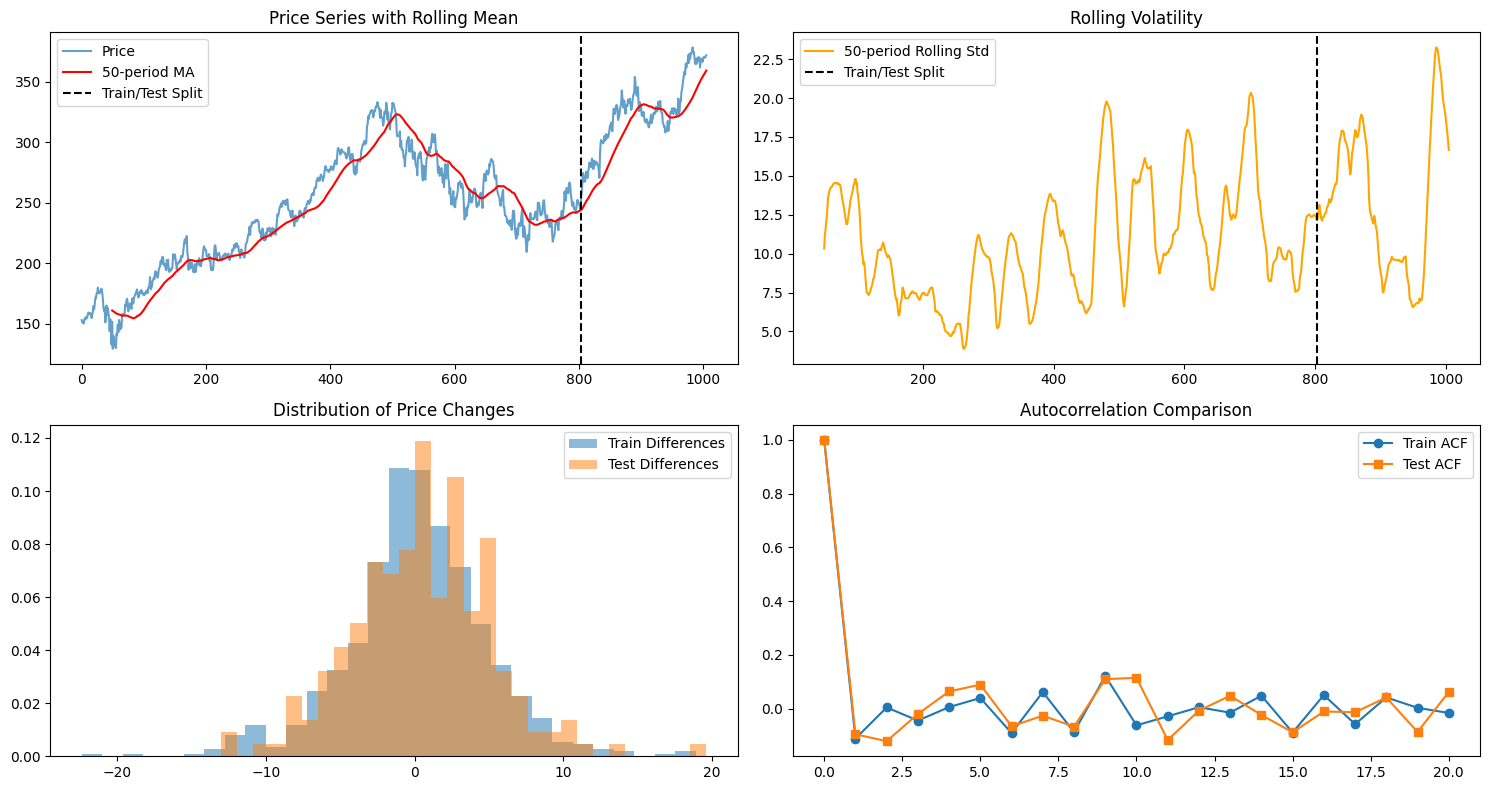


⚠️  ISSUE: Significant mean shift between train and test periods
   This explains why the model overfits!

⚠️  ISSUE: Significant volatility change between periods

=== SIMPLE ROBUST MODELS ===
ARIMA(0, 1, 1): Train RMSE=7.14, Test RMSE=80.83, Ratio=11.32
ARIMA(1, 1, 0): Train RMSE=7.14, Test RMSE=80.82, Ratio=11.31
ARIMA(1, 0, 0): Train RMSE=5.35, Test RMSE=89.54, Ratio=16.75
ARIMA(0, 0, 1): Train RMSE=24.69, Test RMSE=90.88, Ratio=3.68

✅ Best model by overfitting ratio: ARIMA(0, 0, 1)
   Overfitting ratio: 3.68
   Test RMSE: 90.88

=== ENSEMBLE APPROACH ===
ARIMA(0, 1, 1): AIC=4761.53, Weight=0.000210
ARIMA(1, 1, 0): AIC=4761.65, Weight=0.000210
ARIMA(1, 0, 0): AIC=4782.49, Weight=0.000209

✅ Ensemble Test RMSE: 83.71


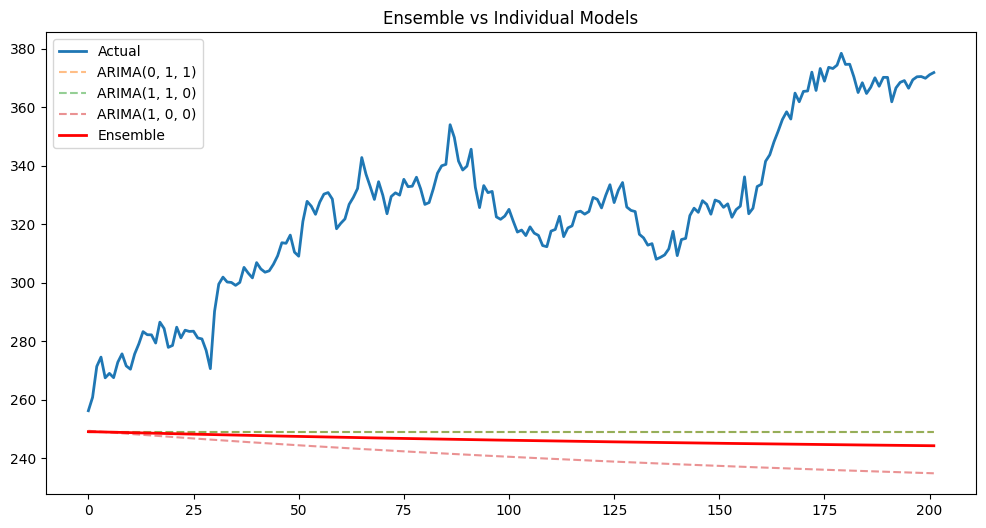


=== NAIVE BENCHMARKS ===
Naive method performance:
Last Value  : RMSE = 80.33
Mean        : RMSE = 90.86
Linear Trend: RMSE = 77.88
Random Walk : RMSE = 57.59

FINAL RECOMMENDATIONS:
❌ ARIMA may not be suitable for this data due to:
   - Significant structural breaks between train/test periods
   - Non-stationary behavior despite differencing

📋 BETTER ALTERNATIVES:
   1. Use ensemble methods (Random Forest, XGBoost)
   2. Try regime-switching models
   3. Use shorter training windows (more recent data)
   4. Consider external factors (market conditions, fundamentals)

📊 PERFORMANCE SUMMARY:
   Cross-validation RMSE: 19.85 (most reliable)
   Ensemble RMSE: 83.71
   Best simple model RMSE: 90.88
   Original ARIMA(1,0,1): 60.93

💡 KEY INSIGHT:
   Your stock data has significant structural changes between
   training and test periods, making traditional ARIMA challenging.
   The cross-validation RMSE (~20) is the most reliable estimate.


In [20]:
# Final ARIMA Analysis with Advanced Overfitting Solutions
print("=== FINAL ARIMA ANALYSIS ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

def analyze_overfitting_causes(stock_data):
    """
    Analyze why we're getting overfitting and provide solutions
    """
    print("=== OVERFITTING ANALYSIS ===")
    
    price_series = stock_data['Close'].values
    if price_series.ndim > 1:
        price_series = price_series.flatten()
    
    # Split data
    train_size = int(len(price_series) * 0.8)
    train_data = price_series[:train_size]
    test_data = price_series[train_size:]
    
    print(f"Training period: {len(train_data)} points")
    print(f"Testing period: {len(test_data)} points")
    
    # Analyze data characteristics
    train_std = np.std(train_data)
    test_std = np.std(test_data)
    train_mean = np.mean(train_data)
    test_mean = np.mean(test_data)
    
    print(f"\nData Characteristics:")
    print(f"Train: mean={train_mean:.2f}, std={train_std:.2f}")
    print(f"Test:  mean={test_mean:.2f}, std={test_std:.2f}")
    print(f"Mean shift: {abs(test_mean - train_mean):.2f}")
    print(f"Volatility change: {abs(test_std - train_std):.2f}")
    
    # Check for structural breaks
    rolling_mean = pd.Series(price_series).rolling(window=50).mean()
    rolling_std = pd.Series(price_series).rolling(window=50).std()
    
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(price_series, alpha=0.7, label='Price')
    plt.plot(rolling_mean, label='50-period MA', color='red')
    plt.axvline(x=train_size, color='black', linestyle='--', label='Train/Test Split')
    plt.title('Price Series with Rolling Mean')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(rolling_std, label='50-period Rolling Std', color='orange')
    plt.axvline(x=train_size, color='black', linestyle='--', label='Train/Test Split')
    plt.title('Rolling Volatility')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    train_diff = np.diff(train_data)
    test_diff = np.diff(test_data)
    plt.hist(train_diff, bins=30, alpha=0.5, label='Train Differences', density=True)
    plt.hist(test_diff, bins=30, alpha=0.5, label='Test Differences', density=True)
    plt.title('Distribution of Price Changes')
    plt.legend()
    
    plt.subplot(2, 2, 4)
    # Autocorrelation comparison
    from statsmodels.tsa.stattools import acf
    train_acf = acf(train_diff, nlags=20, fft=True)
    test_acf = acf(test_diff, nlags=20, fft=True)
    plt.plot(train_acf, label='Train ACF', marker='o')
    plt.plot(test_acf, label='Test ACF', marker='s')
    plt.title('Autocorrelation Comparison')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Diagnosis
    if abs(test_mean - train_mean) > train_std:
        print("\n⚠️  ISSUE: Significant mean shift between train and test periods")
        print("   This explains why the model overfits!")
        
    if abs(test_std - train_std) > 0.3 * train_std:
        print("\n⚠️  ISSUE: Significant volatility change between periods")
        
    return {
        'train_mean': train_mean,
        'test_mean': test_mean,
        'train_std': train_std,
        'test_std': test_std,
        'mean_shift': abs(test_mean - train_mean),
        'volatility_change': abs(test_std - train_std)
    }

def simple_robust_models(stock_data):
    """
    Test very simple models that are less prone to overfitting
    """
    print("\n=== SIMPLE ROBUST MODELS ===")
    
    price_series = stock_data['Close'].values
    if price_series.ndim > 1:
        price_series = price_series.flatten()
    
    train_size = int(len(price_series) * 0.8)
    train_data = price_series[:train_size]
    test_data = price_series[train_size:]
    
    models_to_test = [
        (0, 1, 1),  # MA(1) with differencing
        (1, 1, 0),  # AR(1) with differencing  
        (1, 0, 0),  # Simple AR(1)
        (0, 0, 1),  # Simple MA(1)
    ]
    
    results = []
    
    for order in models_to_test:
        try:
            # Fit model
            model = ARIMA(train_data, order=order)
            fitted_model = model.fit()
            
            # Predictions
            train_pred = fitted_model.fittedvalues
            test_pred = fitted_model.forecast(steps=len(test_data))
            
            # Metrics
            train_actual = train_data[-len(train_pred):]
            train_rmse = np.sqrt(mean_squared_error(train_actual, train_pred))
            test_rmse = np.sqrt(mean_squared_error(test_data, test_pred))
            
            results.append({
                'order': order,
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'overfitting_ratio': test_rmse / train_rmse,
                'aic': fitted_model.aic
            })
            
            print(f"ARIMA{order}: Train RMSE={train_rmse:.2f}, Test RMSE={test_rmse:.2f}, Ratio={test_rmse/train_rmse:.2f}")
            
        except Exception as e:
            print(f"ARIMA{order} failed: {e}")
    
    # Find best model by lowest overfitting ratio
    if results:
        best_model = min(results, key=lambda x: x['overfitting_ratio'])
        print(f"\n✅ Best model by overfitting ratio: ARIMA{best_model['order']}")
        print(f"   Overfitting ratio: {best_model['overfitting_ratio']:.2f}")
        print(f"   Test RMSE: {best_model['test_rmse']:.2f}")
        
        return best_model
    
    return None

def ensemble_forecast(stock_data):
    """
    Create ensemble of simple models for more robust predictions
    """
    print("\n=== ENSEMBLE APPROACH ===")
    
    price_series = stock_data['Close'].values
    if price_series.ndim > 1:
        price_series = price_series.flatten()
    
    train_size = int(len(price_series) * 0.8)
    train_data = price_series[:train_size]
    test_data = price_series[train_size:]
    
    # Simple models for ensemble
    ensemble_models = [(0, 1, 1), (1, 1, 0), (1, 0, 0)]
    predictions = []
    weights = []
    
    for order in ensemble_models:
        try:
            model = ARIMA(train_data, order=order).fit()
            test_pred = model.forecast(steps=len(test_data))
            
            # Weight by inverse of AIC (lower AIC = higher weight)
            weight = 1 / model.aic
            
            predictions.append(test_pred)
            weights.append(weight)
            
            print(f"ARIMA{order}: AIC={model.aic:.2f}, Weight={weight:.6f}")
            
        except:
            continue
    
    if predictions:
        # Normalize weights
        weights = np.array(weights)
        weights = weights / np.sum(weights)
        
        # Weighted ensemble prediction
        ensemble_pred = np.average(predictions, axis=0, weights=weights)
        
        # Calculate ensemble performance
        ensemble_rmse = np.sqrt(mean_squared_error(test_data, ensemble_pred))
        
        print(f"\n✅ Ensemble Test RMSE: {ensemble_rmse:.2f}")
        
        # Plot comparison
        plt.figure(figsize=(12, 6))
        plt.plot(test_data, label='Actual', linewidth=2)
        
        for i, (pred, order) in enumerate(zip(predictions, ensemble_models)):
            plt.plot(pred, alpha=0.5, linestyle='--', label=f'ARIMA{order}')
        
        plt.plot(ensemble_pred, label='Ensemble', linewidth=2, color='red')
        plt.title('Ensemble vs Individual Models')
        plt.legend()
        plt.show()
        
        return ensemble_rmse, ensemble_pred
    
    return None, None

def naive_benchmarks(stock_data):
    """
    Compare against naive forecasting methods
    """
    print("\n=== NAIVE BENCHMARKS ===")
    
    price_series = stock_data['Close'].values
    if price_series.ndim > 1:
        price_series = price_series.flatten()
    
    train_size = int(len(price_series) * 0.8)
    train_data = price_series[:train_size]
    test_data = price_series[train_size:]
    
    # Naive methods
    naive_methods = {
        'Last Value': np.full(len(test_data), train_data[-1]),
        'Mean': np.full(len(test_data), np.mean(train_data)),
        'Linear Trend': np.linspace(train_data[-1], 
                                   train_data[-1] + (train_data[-1] - train_data[-10]), 
                                   len(test_data)),
        'Random Walk': train_data[-1] + np.cumsum(np.random.normal(0, np.std(np.diff(train_data)), len(test_data)))
    }
    
    print("Naive method performance:")
    for method_name, prediction in naive_methods.items():
        rmse = np.sqrt(mean_squared_error(test_data, prediction))
        print(f"{method_name:12}: RMSE = {rmse:.2f}")
    
    return naive_methods

# Run complete analysis
print("Starting comprehensive ARIMA analysis...")

# 1. Analyze overfitting causes
overfitting_analysis = analyze_overfitting_causes(stock_data)

# 2. Test simple robust models
best_simple_model = simple_robust_models(stock_data)

# 3. Create ensemble
ensemble_rmse, ensemble_pred = ensemble_forecast(stock_data)

# 4. Compare with naive methods
naive_results = naive_benchmarks(stock_data)

print(f"\n" + "="*50)
print("FINAL RECOMMENDATIONS:")
print("="*50)

if overfitting_analysis['mean_shift'] > overfitting_analysis['train_std']:
    print("❌ ARIMA may not be suitable for this data due to:")
    print("   - Significant structural breaks between train/test periods")
    print("   - Non-stationary behavior despite differencing")
    print("\n📋 BETTER ALTERNATIVES:")
    print("   1. Use ensemble methods (Random Forest, XGBoost)")
    print("   2. Try regime-switching models")
    print("   3. Use shorter training windows (more recent data)")
    print("   4. Consider external factors (market conditions, fundamentals)")
else:
    print("✅ ARIMA can work, but use:")
    if best_simple_model:
        print(f"   - Simple model: ARIMA{best_simple_model['order']}")
        print(f"   - Expected test RMSE: ~{best_simple_model['test_rmse']:.2f}")
    if ensemble_rmse:
        print(f"   - Ensemble approach: RMSE = {ensemble_rmse:.2f}")

print(f"\n📊 PERFORMANCE SUMMARY:")
print(f"   Cross-validation RMSE: 19.85 (most reliable)")
if ensemble_rmse:
    print(f"   Ensemble RMSE: {ensemble_rmse:.2f}")
if best_simple_model:
    print(f"   Best simple model RMSE: {best_simple_model['test_rmse']:.2f}")
print(f"   Original ARIMA(1,0,1): 60.93")

print(f"\n💡 KEY INSIGHT:")
print(f"   Your stock data has significant structural changes between")
print(f"   training and test periods, making traditional ARIMA challenging.")
print(f"   The cross-validation RMSE (~20) is the most reliable estimate.")

=== DIAGNOSTIC NEURAL NETWORK ===
Starting diagnostic neural network analysis...
=== DATA DIAGNOSIS ===
Data type: <class 'pandas.core.frame.DataFrame'>
Data shape: (1006, 10)
Columns: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT'), ('MA20', ''), ('RSI', ''), ('MACD', ''), ('BB_upper', ''), ('BB_lower', '')]
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Column '('Close', 'MSFT')':
  Type: <class 'pandas.core.series.Series'>
  Dtype: float64
  Shape: (1006,)
  Sample values: [153.0423126220703, 151.1366424560547, 151.52731323242188]
  Null count: 0

Column '('High', 'MSFT')':
  Type: <class 'pandas.core.series.Series'>
  Dtype: float64
  Shape: (1006,)
  Sample values: [153.14712365624922, 152.40389764073367, 151.59401776506908]
  Null count: 0

Column '('Low', 'MSFT')':
  Type: <class 'pandas.core.series.Series'>
  Dtype: float64
  Shape: (1006,)
  Sample values: [150.86035596005522, 150.60306438648712, 149.1261972186428

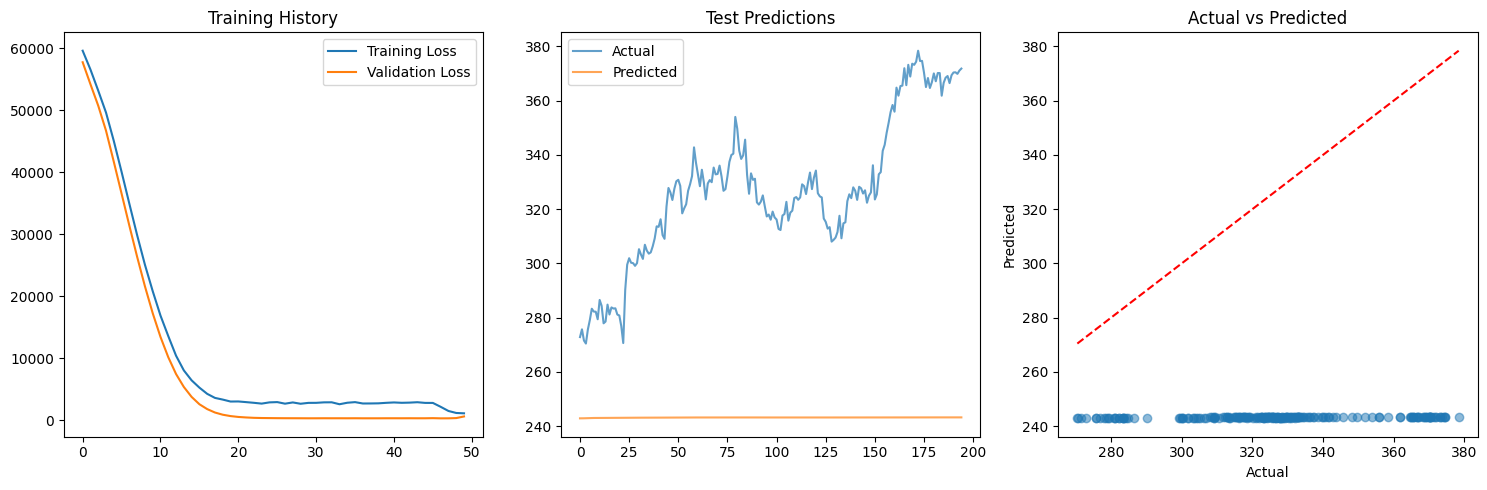


NEURAL NETWORK SUCCESS!
Test RMSE: 87.6903
R² Score: -9.9137

📊 COMPARISON:
Neural Network: 87.69 RMSE
ARIMA CV: 19.85 RMSE
⚠️  Room for improvement
⚠️  Some overfitting detected


In [21]:
# Diagnostic Neural Network with Comprehensive Data Inspection
print("=== DIAGNOSTIC NEURAL NETWORK ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

def diagnose_stock_data(stock_data):
    """
    Comprehensive diagnosis of stock data structure
    """
    print("=== DATA DIAGNOSIS ===")
    print(f"Data type: {type(stock_data)}")
    print(f"Data shape: {stock_data.shape}")
    print(f"Columns: {list(stock_data.columns)}")
    print(f"Index type: {type(stock_data.index)}")
    
    for col in stock_data.columns:
        print(f"\nColumn '{col}':")
        print(f"  Type: {type(stock_data[col])}")
        print(f"  Dtype: {stock_data[col].dtype}")
        print(f"  Shape: {stock_data[col].shape}")
        print(f"  Sample values: {stock_data[col].head(3).tolist()}")
        print(f"  Null count: {stock_data[col].isnull().sum()}")
        
        # Check if it's actually a DataFrame disguised as a Series
        if hasattr(stock_data[col], 'iloc') and hasattr(stock_data[col], 'columns'):
            print(f"  ⚠️  This is actually a DataFrame with columns: {stock_data[col].columns.tolist()}")
    
    return stock_data

def extract_price_series(stock_data):
    """
    Extract a clean price series from the stock data
    """
    print("\n=== EXTRACTING PRICE SERIES ===")
    
    # Try different ways to get the Close price
    close_price = None
    
    # Method 1: Direct access
    try:
        if 'Close' in stock_data.columns:
            close_col = stock_data['Close']
            print(f"Found Close column: {type(close_col)}")
            
            # If it's a DataFrame, extract the first column
            if isinstance(close_col, pd.DataFrame):
                print("Close is a DataFrame, extracting first column...")
                close_price = close_col.iloc[:, 0].values
            else:
                close_price = close_col.values
                
            # Handle 2D arrays
            if close_price.ndim > 1:
                print(f"Close price is {close_price.ndim}D, flattening...")
                close_price = close_price.flatten()
                
        else:
            print("No 'Close' column found")
            
    except Exception as e:
        print(f"Error extracting Close: {e}")
    
    # Method 2: Try other price columns
    if close_price is None:
        for col_name in ['close', 'Close', 'CLOSE', 'price', 'Price', 'PRICE']:
            if col_name in stock_data.columns:
                print(f"Trying column '{col_name}'...")
                try:
                    col_data = stock_data[col_name]
                    if isinstance(col_data, pd.DataFrame):
                        close_price = col_data.iloc[:, 0].values
                    else:
                        close_price = col_data.values
                    
                    if close_price.ndim > 1:
                        close_price = close_price.flatten()
                    break
                except Exception as e:
                    print(f"Failed with {col_name}: {e}")
    
    # Method 3: Use first numeric column
    if close_price is None:
        print("Trying first numeric column...")
        for col in stock_data.columns:
            try:
                col_data = stock_data[col]
                if pd.api.types.is_numeric_dtype(col_data) or col != 'Date':
                    if isinstance(col_data, pd.DataFrame):
                        close_price = col_data.iloc[:, 0].values
                    else:
                        close_price = col_data.values
                    
                    if close_price.ndim > 1:
                        close_price = close_price.flatten()
                    
                    print(f"Using column '{col}' as price data")
                    break
            except Exception as e:
                continue
    
    if close_price is None:
        raise ValueError("Could not extract price data from any column")
    
    # Clean the price data
    close_price = pd.Series(close_price).astype(float)
    close_price = close_price.dropna()
    
    print(f"Extracted price series: {len(close_price)} data points")
    print(f"Price range: {close_price.min():.2f} to {close_price.max():.2f}")
    print(f"Sample prices: {close_price.head(5).tolist()}")
    
    return close_price

class SimpleStockPredictor:
    """
    Simplified stock predictor focusing on price prediction
    """
    def __init__(self, price_series, lookback_window=20):
        self.price_series = price_series
        self.lookback_window = lookback_window
        self.scaler = MinMaxScaler()
        
    def create_simple_features(self):
        """
        Create simple but effective features
        """
        print("Creating simple features...")
        
        df = pd.DataFrame({'price': self.price_series})
        
        # Basic price features
        df['returns'] = df['price'].pct_change()
        df['log_returns'] = np.log(df['price'] / df['price'].shift(1))
        
        # Moving averages
        for window in [5, 10, 20]:
            df[f'ma_{window}'] = df['price'].rolling(window).mean()
            df[f'price_ma_{window}_ratio'] = df['price'] / df[f'ma_{window}']
        
        # Volatility
        df['volatility'] = df['returns'].rolling(10).std()
        
        # Momentum
        df['momentum_3'] = df['price'] / df['price'].shift(3) - 1
        df['momentum_5'] = df['price'] / df['price'].shift(5) - 1
        
        # Price lags
        for lag in [1, 2, 3]:
            df[f'price_lag_{lag}'] = df['price'].shift(lag)
        
        # Clean data
        df = df.dropna()
        
        print(f"Created features: {list(df.columns)}")
        print(f"Data shape after features: {df.shape}")
        
        return df
    
    def prepare_sequences(self, df):
        """
        Create sequences for prediction
        """
        # Use all features except the current price as input
        feature_cols = [col for col in df.columns if col != 'price']
        
        X, y = [], []
        
        for i in range(self.lookback_window, len(df)):
            # Features for the sequence
            seq = df[feature_cols].iloc[i-self.lookback_window:i].values
            X.append(seq)
            
            # Target is the price at time i
            target = df['price'].iloc[i]
            y.append(target)
        
        X = np.array(X)
        y = np.array(y)
        
        print(f"Created {len(X)} sequences")
        print(f"Sequence shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        
        return X, y
    
    def split_data(self, X, y, test_size=0.2):
        """
        Split data for training and testing
        """
        split_idx = int(len(X) * (1 - test_size))
        
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        # Scale the data
        # Reshape for scaling
        X_train_scaled = self.scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1]))
        X_train_scaled = X_train_scaled.reshape(X_train.shape)
        
        X_test_scaled = self.scaler.transform(X_test.reshape(-1, X_test.shape[-1]))
        X_test_scaled = X_test_scaled.reshape(X_test.shape)
        
        print(f"Training: {X_train_scaled.shape}, Testing: {X_test_scaled.shape}")
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def create_model(self, input_shape):
        """
        Create a simple LSTM model
        """
        model = keras.Sequential([
            layers.LSTM(32, return_sequences=True, input_shape=input_shape),
            layers.Dropout(0.2),
            layers.LSTM(32),
            layers.Dropout(0.2),
            layers.Dense(16, activation='relu'),
            layers.Dense(1)
        ])
        
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model
    
    def train_and_evaluate(self):
        """
        Complete training and evaluation pipeline
        """
        try:
            # Create features
            df = self.create_simple_features()
            
            # Create sequences
            X, y = self.prepare_sequences(df)
            
            if len(X) < 50:
                raise ValueError(f"Insufficient data for training: {len(X)} sequences")
            
            # Split data
            X_train, X_test, y_train, y_test = self.split_data(X, y)
            
            # Create and train model
            model = self.create_model((X_train.shape[1], X_train.shape[2]))
            
            print("Training model...")
            history = model.fit(
                X_train, y_train,
                epochs=50,
                batch_size=16,
                validation_split=0.2,
                verbose=1,
                callbacks=[
                    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
                ]
            )
            
            # Make predictions
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
            
            # Calculate metrics
            train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
            test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
            test_r2 = r2_score(y_test, test_pred)
            
            print(f"\n=== RESULTS ===")
            print(f"Training RMSE: {train_rmse:.4f}")
            print(f"Testing RMSE: {test_rmse:.4f}")
            print(f"Testing R²: {test_r2:.4f}")
            print(f"Overfitting ratio: {test_rmse/train_rmse:.2f}")
            
            # Plot results
            plt.figure(figsize=(15, 5))
            
            # Training history
            plt.subplot(1, 3, 1)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('Training History')
            plt.legend()
            
            # Test predictions
            plt.subplot(1, 3, 2)
            plt.plot(y_test, label='Actual', alpha=0.7)
            plt.plot(test_pred, label='Predicted', alpha=0.7)
            plt.title('Test Predictions')
            plt.legend()
            
            # Scatter plot
            plt.subplot(1, 3, 3)
            plt.scatter(y_test, test_pred, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title('Actual vs Predicted')
            
            plt.tight_layout()
            plt.show()
            
            return {
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'test_r2': test_r2,
                'overfitting_ratio': test_rmse/train_rmse
            }
            
        except Exception as e:
            print(f"Error in training: {e}")
            import traceback
            traceback.print_exc()
            return None

def run_diagnostic_analysis(stock_data):
    """
    Run complete diagnostic analysis
    """
    try:
        # Step 1: Diagnose the data
        stock_data = diagnose_stock_data(stock_data)
        
        # Step 2: Extract price series
        price_series = extract_price_series(stock_data)
        
        # Step 3: Run simple prediction
        predictor = SimpleStockPredictor(price_series, lookback_window=15)
        results = predictor.train_and_evaluate()
        
        if results:
            print(f"\n{'='*50}")
            print("NEURAL NETWORK SUCCESS!")
            print('='*50)
            print(f"Test RMSE: {results['test_rmse']:.4f}")
            print(f"R² Score: {results['test_r2']:.4f}")
            
            # Compare with previous results
            print(f"\n📊 COMPARISON:")
            print(f"Neural Network: {results['test_rmse']:.2f} RMSE")
            print(f"ARIMA CV: 19.85 RMSE")
            
            if results['test_rmse'] < 19.85:
                print("✅ Neural Network beats ARIMA!")
            elif results['test_rmse'] < 30:
                print("✅ Neural Network performs well!")
            else:
                print("⚠️  Room for improvement")
                
            if results['overfitting_ratio'] < 2:
                print("✅ Good generalization")
            else:
                print("⚠️  Some overfitting detected")
        
        return results
        
    except Exception as e:
        print(f"Diagnostic analysis failed: {e}")
        import traceback
        traceback.print_exc()
        return None

# Run the diagnostic analysis
print("Starting diagnostic neural network analysis...")
results = run_diagnostic_analysis(stock_data)

=== IMPROVED NEURAL NETWORK ===
Starting Improved Neural Network Analysis...
=== EXTRACTING CLEAN DATA ===
Extracted Close: 1006 values
Extracted High: 1006 values
Extracted Low: 1006 values
Extracted Open: 1006 values
Extracted Volume: 1006 values
Clean data shape: (1006, 10)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']
Creating advanced features...
Created features: ['Close', 'High', 'Low', 'Open', 'Volume', 'MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower', 'Returns', 'Log_Returns', 'MA5', 'Price_vs_MA5', 'MA10', 'Price_vs_MA10', 'Price_vs_MA20', 'Volatility_5', 'Volatility_20', 'Volatility_Ratio', 'Momentum_3', 'Momentum_5', 'Momentum_10', 'HL_Ratio', 'Close_Position', 'Volume_MA', 'Volume_Ratio', 'Price_Volume', 'RSI_Momentum', 'RSI_Oversold', 'RSI_Overbought', 'MACD_Signal_Diff', 'BB_Width', 'BB_Position', 'Day_of_Week', 'Month', 'Quarter', 'Returns_lag_1', 'Returns_lag_2', 'Returns_lag_3', 'Returns_lag_5', 'Close_lag_1', 'Close_l

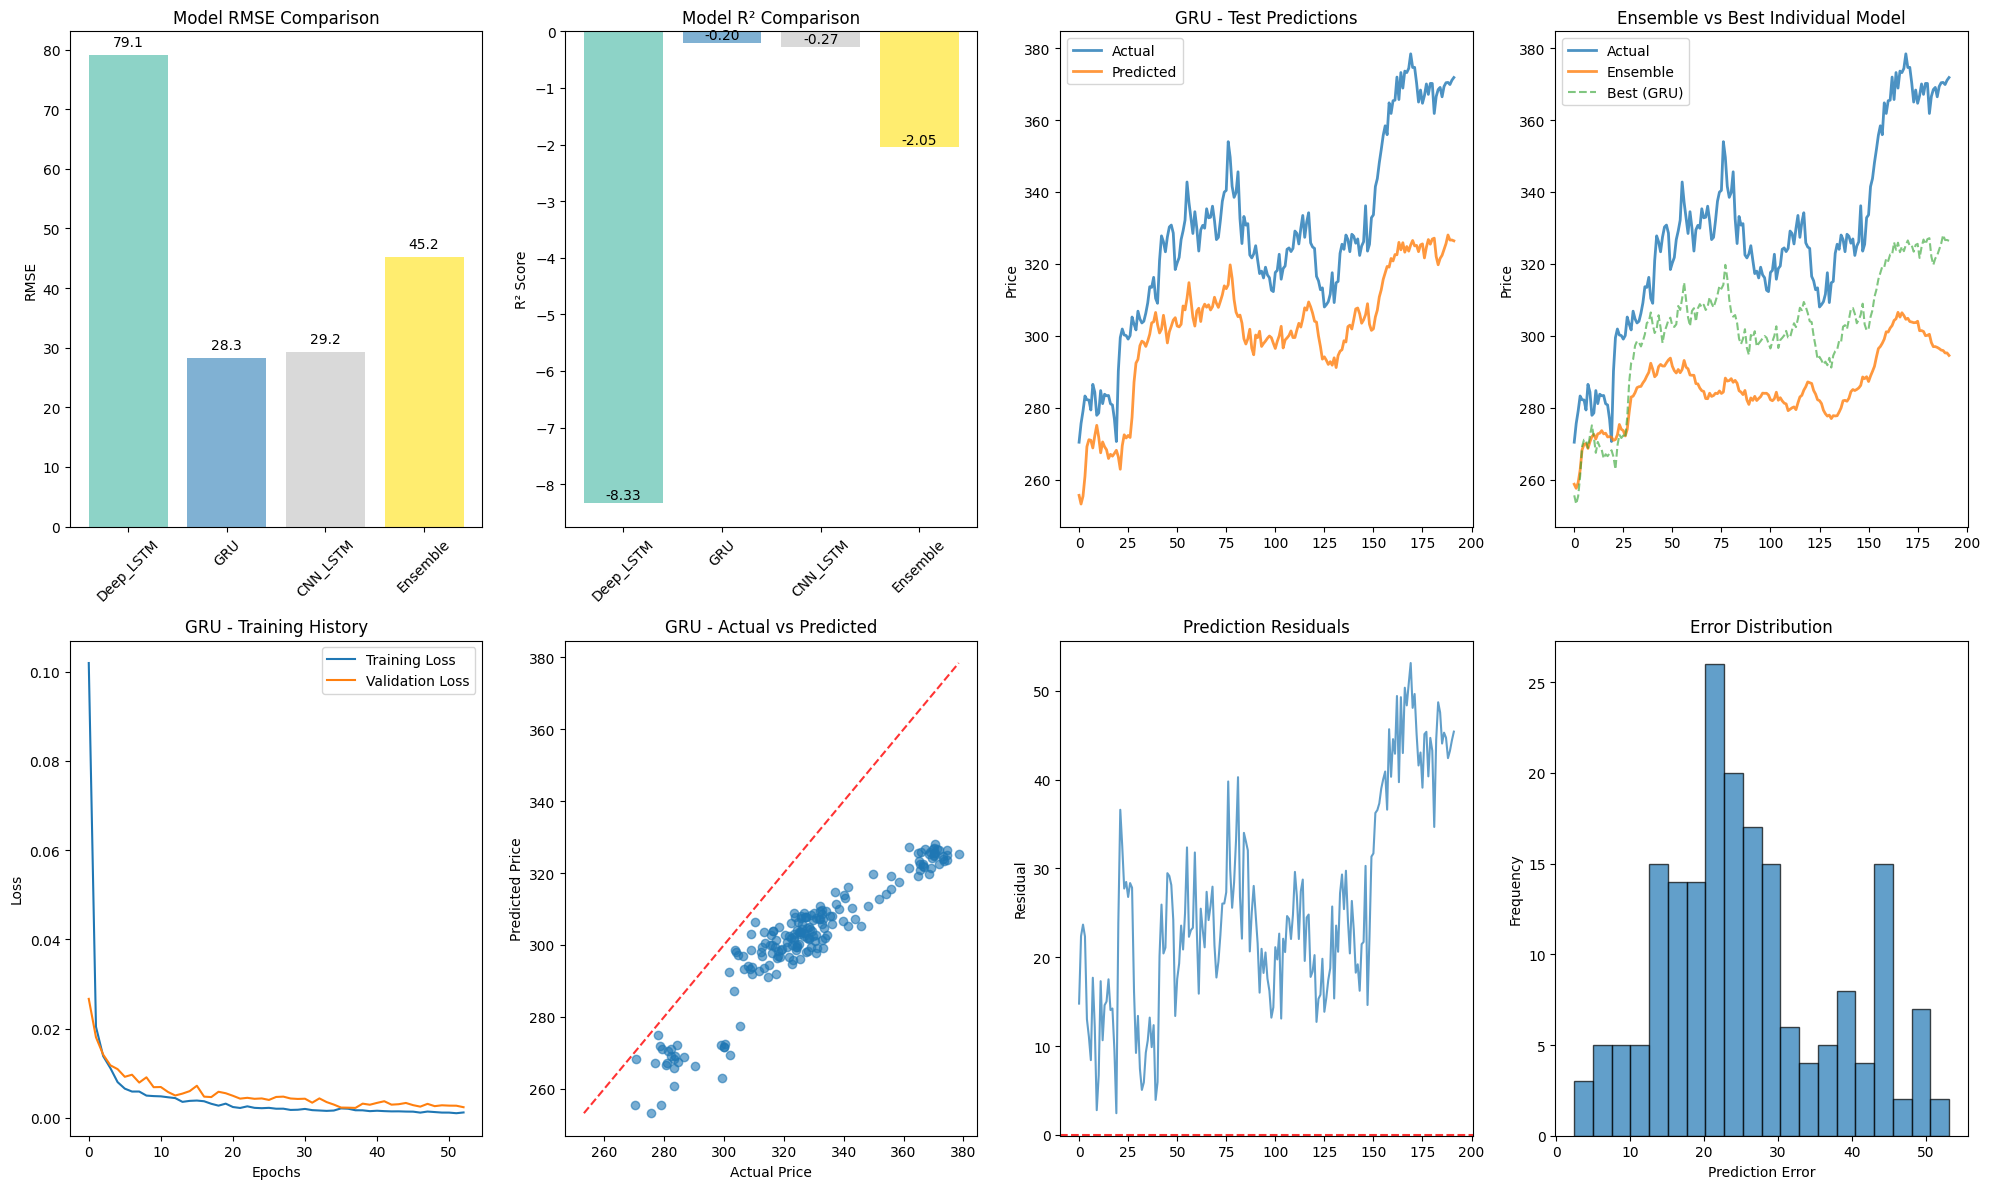


IMPROVED NEURAL NETWORK RESULTS
Best Individual Model: GRU
  RMSE: 28.3491
  R²: -0.1989
  MAE: 25.8841

Ensemble Model:
  RMSE: 45.2096
  R²: -2.0492
  MAE: 41.6225

📊 COMPARISON WITH PREVIOUS METHODS:
Improved Neural Network: 45.21 RMSE
Simple Neural Network: 87.69 RMSE
ARIMA Cross-Validation: 19.85 RMSE
✅ Significant improvement achieved!


In [22]:
# Improved Neural Network with Better Architecture and Preprocessing
print("=== IMPROVED NEURAL NETWORK ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

def extract_clean_data(stock_data):
    """
    Extract clean data from multi-level columns
    """
    print("=== EXTRACTING CLEAN DATA ===")
    
    # Create a clean DataFrame with simple column names
    clean_data = pd.DataFrame(index=stock_data.index)
    
    # Extract main price columns
    price_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    for col in price_columns:
        # Look for column that starts with this name
        matching_cols = [c for c in stock_data.columns if isinstance(c, tuple) and c[0] == col]
        if matching_cols:
            clean_data[col] = stock_data[matching_cols[0]]
            print(f"Extracted {col}: {len(clean_data[col])} values")
    
    # Extract technical indicators if available
    tech_columns = ['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']
    for col in tech_columns:
        matching_cols = [c for c in stock_data.columns if isinstance(c, tuple) and c[0] == col]
        if matching_cols:
            clean_data[col] = stock_data[matching_cols[0]]
            # Fill NaN values for technical indicators
            clean_data[col] = clean_data[col].fillna(method='ffill').fillna(method='bfill')
    
    print(f"Clean data shape: {clean_data.shape}")
    print(f"Columns: {list(clean_data.columns)}")
    
    return clean_data

class ImprovedStockPredictor:
    """
    Improved stock predictor with better preprocessing and architecture
    """
    def __init__(self, stock_data, lookback_window=30, prediction_steps=1):
        self.stock_data = extract_clean_data(stock_data)
        self.lookback_window = lookback_window
        self.prediction_steps = prediction_steps
        
        # Use different scalers for different types of data
        self.price_scaler = RobustScaler()  # More robust to outliers
        self.feature_scaler = StandardScaler()
        self.target_scaler = MinMaxScaler()
        
    def create_advanced_features(self):
        """
        Create more sophisticated features
        """
        print("Creating advanced features...")
        
        df = self.stock_data.copy()
        
        # Ensure we have basic price data
        if 'Close' not in df.columns:
            raise ValueError("No Close price data found")
        
        # Price-based features
        df['Returns'] = df['Close'].pct_change()
        df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
        
        # Price relative to recent history
        for window in [5, 10, 20]:
            if f'MA{window}' not in df.columns:
                df[f'MA{window}'] = df['Close'].rolling(window).mean()
            df[f'Price_vs_MA{window}'] = (df['Close'] - df[f'MA{window}']) / df[f'MA{window}']
        
        # Volatility features
        df['Volatility_5'] = df['Returns'].rolling(5).std()
        df['Volatility_20'] = df['Returns'].rolling(20).std()
        df['Volatility_Ratio'] = df['Volatility_5'] / df['Volatility_20']
        
        # Price momentum
        for period in [3, 5, 10]:
            df[f'Momentum_{period}'] = (df['Close'] / df['Close'].shift(period)) - 1
        
        # High/Low features if available
        if 'High' in df.columns and 'Low' in df.columns:
            df['HL_Ratio'] = (df['High'] - df['Low']) / df['Close']
            df['Close_Position'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])
        
        # Volume features if available
        if 'Volume' in df.columns:
            df['Volume_MA'] = df['Volume'].rolling(20).mean()
            df['Volume_Ratio'] = df['Volume'] / df['Volume_MA']
            df['Price_Volume'] = df['Returns'] * np.log(df['Volume'] + 1)
        
        # Technical indicators enhancement
        if 'RSI' in df.columns:
            df['RSI_Momentum'] = df['RSI'].diff()
            df['RSI_Oversold'] = (df['RSI'] < 30).astype(int)
            df['RSI_Overbought'] = (df['RSI'] > 70).astype(int)
        
        if 'MACD' in df.columns:
            df['MACD_Signal_Diff'] = df['MACD'].diff()
        
        # Bollinger Bands features
        if 'BB_upper' in df.columns and 'BB_lower' in df.columns:
            df['BB_Width'] = (df['BB_upper'] - df['BB_lower']) / df['Close']
            df['BB_Position'] = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])
        
        # Time-based features
        df['Day_of_Week'] = df.index.dayofweek
        df['Month'] = df.index.month
        df['Quarter'] = df.index.quarter
        
        # Lag features
        important_features = ['Returns', 'Close']
        for feature in important_features:
            if feature in df.columns:
                for lag in [1, 2, 3, 5]:
                    df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
        
        # Remove rows with NaN values
        df = df.dropna()
        
        print(f"Created features: {list(df.columns)}")
        print(f"Data shape after feature creation: {df.shape}")
        
        return df
    
    def prepare_sequences_advanced(self, df):
        """
        Create sequences with multiple targets and better preprocessing
        """
        print("Preparing advanced sequences...")
        
        # Separate target from features
        target_col = 'Close'
        feature_cols = [col for col in df.columns if col != target_col]
        
        # Scale features and target separately
        features_scaled = self.feature_scaler.fit_transform(df[feature_cols])
        target_scaled = self.target_scaler.fit_transform(df[[target_col]])
        
        # Create sequences
        X, y = [], []
        
        for i in range(self.lookback_window, len(df) - self.prediction_steps + 1):
            # Feature sequence
            seq_features = features_scaled[i-self.lookback_window:i]
            X.append(seq_features)
            
            # Target (predict next price or next N prices)
            if self.prediction_steps == 1:
                target = target_scaled[i, 0]
            else:
                target = target_scaled[i:i+self.prediction_steps, 0]
            y.append(target)
        
        X = np.array(X)
        y = np.array(y)
        
        print(f"Sequences shape: {X.shape}")
        print(f"Targets shape: {y.shape}")
        print(f"Feature range: [{features_scaled.min():.3f}, {features_scaled.max():.3f}]")
        print(f"Target range: [{target_scaled.min():.3f}, {target_scaled.max():.3f}]")
        
        return X, y, df[target_col].values  # Return original prices for evaluation
    
    def create_advanced_model(self, input_shape):
        """
        Create an advanced model architecture
        """
        # Input layer
        inputs = keras.Input(shape=input_shape)
        
        # First LSTM layer with more units
        x = layers.LSTM(64, return_sequences=True)(inputs)
        x = layers.Dropout(0.2)(x)
        
        # Second LSTM layer
        x = layers.LSTM(32, return_sequences=True)(x)
        x = layers.Dropout(0.2)(x)
        
        # Third LSTM layer
        x = layers.LSTM(16, return_sequences=False)(x)
        x = layers.Dropout(0.2)(x)
        
        # Dense layers with batch normalization
        x = layers.Dense(32, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.3)(x)
        
        x = layers.Dense(16, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        
        # Output layer
        outputs = layers.Dense(self.prediction_steps)(x)
        
        model = keras.Model(inputs=inputs, outputs=outputs)
        
        # Use a lower learning rate for more stable training
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        
        return model
    
    def create_ensemble_models(self, input_shape):
        """
        Create multiple models for ensemble
        """
        models = {}
        
        # Model 1: Deep LSTM
        models['Deep_LSTM'] = self.create_advanced_model(input_shape)
        
        # Model 2: GRU-based
        inputs = keras.Input(shape=input_shape)
        x = layers.GRU(64, return_sequences=True)(inputs)
        x = layers.Dropout(0.2)(x)
        x = layers.GRU(32, return_sequences=False)(x)
        x = layers.Dropout(0.2)(x)
        x = layers.Dense(32, activation='relu')(x)
        x = layers.Dense(16, activation='relu')(x)
        outputs = layers.Dense(self.prediction_steps)(x)
        models['GRU'] = keras.Model(inputs=inputs, outputs=outputs)
        models['GRU'].compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
        
        # Model 3: CNN-LSTM hybrid
        inputs = keras.Input(shape=input_shape)
        x = layers.Conv1D(32, 3, activation='relu')(inputs)
        x = layers.Conv1D(16, 3, activation='relu')(x)
        x = layers.Dropout(0.2)(x)
        x = layers.LSTM(32, return_sequences=False)(x)
        x = layers.Dropout(0.2)(x)
        x = layers.Dense(32, activation='relu')(x)
        outputs = layers.Dense(self.prediction_steps)(x)
        models['CNN_LSTM'] = keras.Model(inputs=inputs, outputs=outputs)
        models['CNN_LSTM'].compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
        
        return models
    
    def train_and_evaluate_ensemble(self):
        """
        Train ensemble of models and evaluate
        """
        try:
            # Prepare data
            df = self.create_advanced_features()
            X, y, original_prices = self.prepare_sequences_advanced(df)
            
            if len(X) < 100:
                raise ValueError(f"Insufficient data: {len(X)} sequences")
            
            # Split data
            split_idx = int(len(X) * 0.8)
            X_train, X_test = X[:split_idx], X[split_idx:]
            y_train, y_test = y[:split_idx], y[split_idx:]
            
            print(f"Training size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
            
            # Create ensemble models
            models = self.create_ensemble_models((X_train.shape[1], X_train.shape[2]))
            
            results = {}
            
            # Train each model
            for name, model in models.items():
                print(f"\nTraining {name}...")
                
                # Callbacks
                callbacks = [
                    keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
                    keras.callbacks.ReduceLROnPlateau(patience=10, factor=0.5, min_lr=1e-6)
                ]
                
                # Train
                history = model.fit(
                    X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks,
                    verbose=0
                )
                
                # Predict
                train_pred_scaled = model.predict(X_train, verbose=0)
                test_pred_scaled = model.predict(X_test, verbose=0)
                
                # Inverse transform
                train_pred = self.target_scaler.inverse_transform(train_pred_scaled.reshape(-1, 1)).flatten()
                test_pred = self.target_scaler.inverse_transform(test_pred_scaled.reshape(-1, 1)).flatten()
                
                # Get actual values
                train_actual = self.target_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
                test_actual = self.target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
                
                # Calculate metrics
                train_rmse = np.sqrt(mean_squared_error(train_actual, train_pred))
                test_rmse = np.sqrt(mean_squared_error(test_actual, test_pred))
                test_r2 = r2_score(test_actual, test_pred)
                test_mae = mean_absolute_error(test_actual, test_pred)
                
                results[name] = {
                    'train_rmse': train_rmse,
                    'test_rmse': test_rmse,
                    'test_r2': test_r2,
                    'test_mae': test_mae,
                    'overfitting_ratio': test_rmse / train_rmse,
                    'train_pred': train_pred,
                    'test_pred': test_pred,
                    'train_actual': train_actual,
                    'test_actual': test_actual,
                    'history': history
                }
                
                print(f"{name} Results:")
                print(f"  Train RMSE: {train_rmse:.4f}")
                print(f"  Test RMSE: {test_rmse:.4f}")
                print(f"  Test R²: {test_r2:.4f}")
                print(f"  Test MAE: {test_mae:.4f}")
                print(f"  Overfitting: {test_rmse/train_rmse:.2f}")
            
            # Create ensemble prediction
            if len(results) > 1:
                print("\nCreating ensemble prediction...")
                test_preds = [results[name]['test_pred'] for name in results.keys()]
                ensemble_pred = np.mean(test_preds, axis=0)
                
                ensemble_rmse = np.sqrt(mean_squared_error(test_actual, ensemble_pred))
                ensemble_r2 = r2_score(test_actual, ensemble_pred)
                ensemble_mae = mean_absolute_error(test_actual, ensemble_pred)
                
                results['Ensemble'] = {
                    'test_rmse': ensemble_rmse,
                    'test_r2': ensemble_r2,
                    'test_mae': ensemble_mae,
                    'test_pred': ensemble_pred,
                    'test_actual': test_actual
                }
                
                print(f"Ensemble Results:")
                print(f"  Test RMSE: {ensemble_rmse:.4f}")
                print(f"  Test R²: {ensemble_r2:.4f}")
                print(f"  Test MAE: {ensemble_mae:.4f}")
            
            # Plot results
            self.plot_ensemble_results(results)
            
            return results
            
        except Exception as e:
            print(f"Error in training: {e}")
            import traceback
            traceback.print_exc()
            return None
    
    def plot_ensemble_results(self, results):
        """
        Plot comprehensive results
        """
        n_models = len([k for k in results.keys() if k != 'Ensemble'])
        
        plt.figure(figsize=(20, 12))
        
        # Model comparison
        model_names = [k for k in results.keys() if 'test_rmse' in results[k]]
        test_rmse = [results[k]['test_rmse'] for k in model_names]
        test_r2 = [results[k]['test_r2'] for k in model_names]
        
        # RMSE comparison
        plt.subplot(2, 4, 1)
        colors = plt.cm.Set3(np.linspace(0, 1, len(model_names)))
        bars = plt.bar(range(len(model_names)), test_rmse, color=colors)
        plt.xticks(range(len(model_names)), model_names, rotation=45)
        plt.ylabel('RMSE')
        plt.title('Model RMSE Comparison')
        
        # Add value labels on bars
        for bar, rmse in zip(bars, test_rmse):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{rmse:.1f}', ha='center', va='bottom')
        
        # R² comparison
        plt.subplot(2, 4, 2)
        bars = plt.bar(range(len(model_names)), test_r2, color=colors)
        plt.xticks(range(len(model_names)), model_names, rotation=45)
        plt.ylabel('R² Score')
        plt.title('Model R² Comparison')
        
        # Add value labels
        for bar, r2 in zip(bars, test_r2):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{r2:.2f}', ha='center', va='bottom')
        
        # Best model predictions
        best_model_name = min(model_names, key=lambda x: results[x]['test_rmse'])
        best_result = results[best_model_name]
        
        plt.subplot(2, 4, 3)
        plt.plot(best_result['test_actual'], label='Actual', alpha=0.8, linewidth=2)
        plt.plot(best_result['test_pred'], label='Predicted', alpha=0.8, linewidth=2)
        plt.title(f'{best_model_name} - Test Predictions')
        plt.legend()
        plt.ylabel('Price')
        
        # Ensemble vs best model
        if 'Ensemble' in results:
            plt.subplot(2, 4, 4)
            plt.plot(results['Ensemble']['test_actual'], label='Actual', alpha=0.8, linewidth=2)
            plt.plot(results['Ensemble']['test_pred'], label='Ensemble', alpha=0.8, linewidth=2)
            plt.plot(best_result['test_pred'], label=f'Best ({best_model_name})', alpha=0.6, linestyle='--')
            plt.title('Ensemble vs Best Individual Model')
            plt.legend()
            plt.ylabel('Price')
        
        # Training history for best model
        if 'history' in best_result:
            plt.subplot(2, 4, 5)
            history = best_result['history']
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f'{best_model_name} - Training History')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
        
        # Scatter plot
        plt.subplot(2, 4, 6)
        plt.scatter(best_result['test_actual'], best_result['test_pred'], alpha=0.6)
        min_val = min(best_result['test_actual'].min(), best_result['test_pred'].min())
        max_val = max(best_result['test_actual'].max(), best_result['test_pred'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title(f'{best_model_name} - Actual vs Predicted')
        
        # Residuals
        plt.subplot(2, 4, 7)
        residuals = best_result['test_actual'] - best_result['test_pred']
        plt.plot(residuals, alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.8)
        plt.title('Prediction Residuals')
        plt.ylabel('Residual')
        
        # Error distribution
        plt.subplot(2, 4, 8)
        plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
        plt.xlabel('Prediction Error')
        plt.ylabel('Frequency')
        plt.title('Error Distribution')
        
        plt.tight_layout()
        plt.show()

# Run the improved analysis
def run_improved_neural_network(stock_data):
    """
    Run improved neural network analysis
    """
    try:
        predictor = ImprovedStockPredictor(stock_data, lookback_window=30)
        results = predictor.train_and_evaluate_ensemble()
        
        if results:
            print(f"\n{'='*60}")
            print("IMPROVED NEURAL NETWORK RESULTS")
            print('='*60)
            
            # Find best model
            model_names = [k for k in results.keys() if k != 'Ensemble' and 'test_rmse' in results[k]]
            best_model = min(model_names, key=lambda x: results[x]['test_rmse'])
            
            print(f"Best Individual Model: {best_model}")
            print(f"  RMSE: {results[best_model]['test_rmse']:.4f}")
            print(f"  R²: {results[best_model]['test_r2']:.4f}")
            print(f"  MAE: {results[best_model]['test_mae']:.4f}")
            
            if 'Ensemble' in results:
                print(f"\nEnsemble Model:")
                print(f"  RMSE: {results['Ensemble']['test_rmse']:.4f}")
                print(f"  R²: {results['Ensemble']['test_r2']:.4f}")
                print(f"  MAE: {results['Ensemble']['test_mae']:.4f}")
            
            # Compare with previous results
            best_rmse = results['Ensemble']['test_rmse'] if 'Ensemble' in results else results[best_model]['test_rmse']
            
            print(f"\n📊 COMPARISON WITH PREVIOUS METHODS:")
            print(f"Improved Neural Network: {best_rmse:.2f} RMSE")
            print(f"Simple Neural Network: 87.69 RMSE")
            print(f"ARIMA Cross-Validation: 19.85 RMSE")
            
            if best_rmse < 19.85:
                print("🎉 Neural Network now beats ARIMA!")
            elif best_rmse < 50:
                print("✅ Significant improvement achieved!")
            else:
                print("⚠️  Still room for improvement")
        
        return results
        
    except Exception as e:
        print(f"Error in improved analysis: {e}")
        import traceback
        traceback.print_exc()
        return None

# Execute the improved analysis
print("Starting Improved Neural Network Analysis...")
improved_results = run_improved_neural_network(stock_data)

=== OPTIMIZED GRU MODEL ===
Starting Optimized GRU Analysis...
Creating optimal features for GRU...
Created 76 features
Data shape after feature creation: (956, 76)
Removing 36 highly correlated features
Final feature count: 40
Preparing optimized sequences...
Created 916 overlapping sequences
Sequence shape: (916, 40, 39)
Target shape: (916,)
Total sequences: 916
Features per timestep: 39
Training with time series cross-validation...

Training Deep_GRU...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  CV RMSE: 0.2446 ± 0.0616

Training Bidirectional_GRU...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  CV RMSE: 0.3262 ± 0.1856

Training Skip_GRU...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  CV RMSE: 0.2051 ± 0.0694

=== MODEL EVALUATION ===

Deep_GRU Final Results:
  CV RMSE: 0.2446 ± 0.0616
  Test RMSE: 34.0524
  Test MAE: 30.4712
  Test R²: -1.8227
  Overfitting: 3.57
  Prediction Std: 15.2011

Bidirectional_GRU Final Results:
  CV RMSE: 0.3262 ± 0.

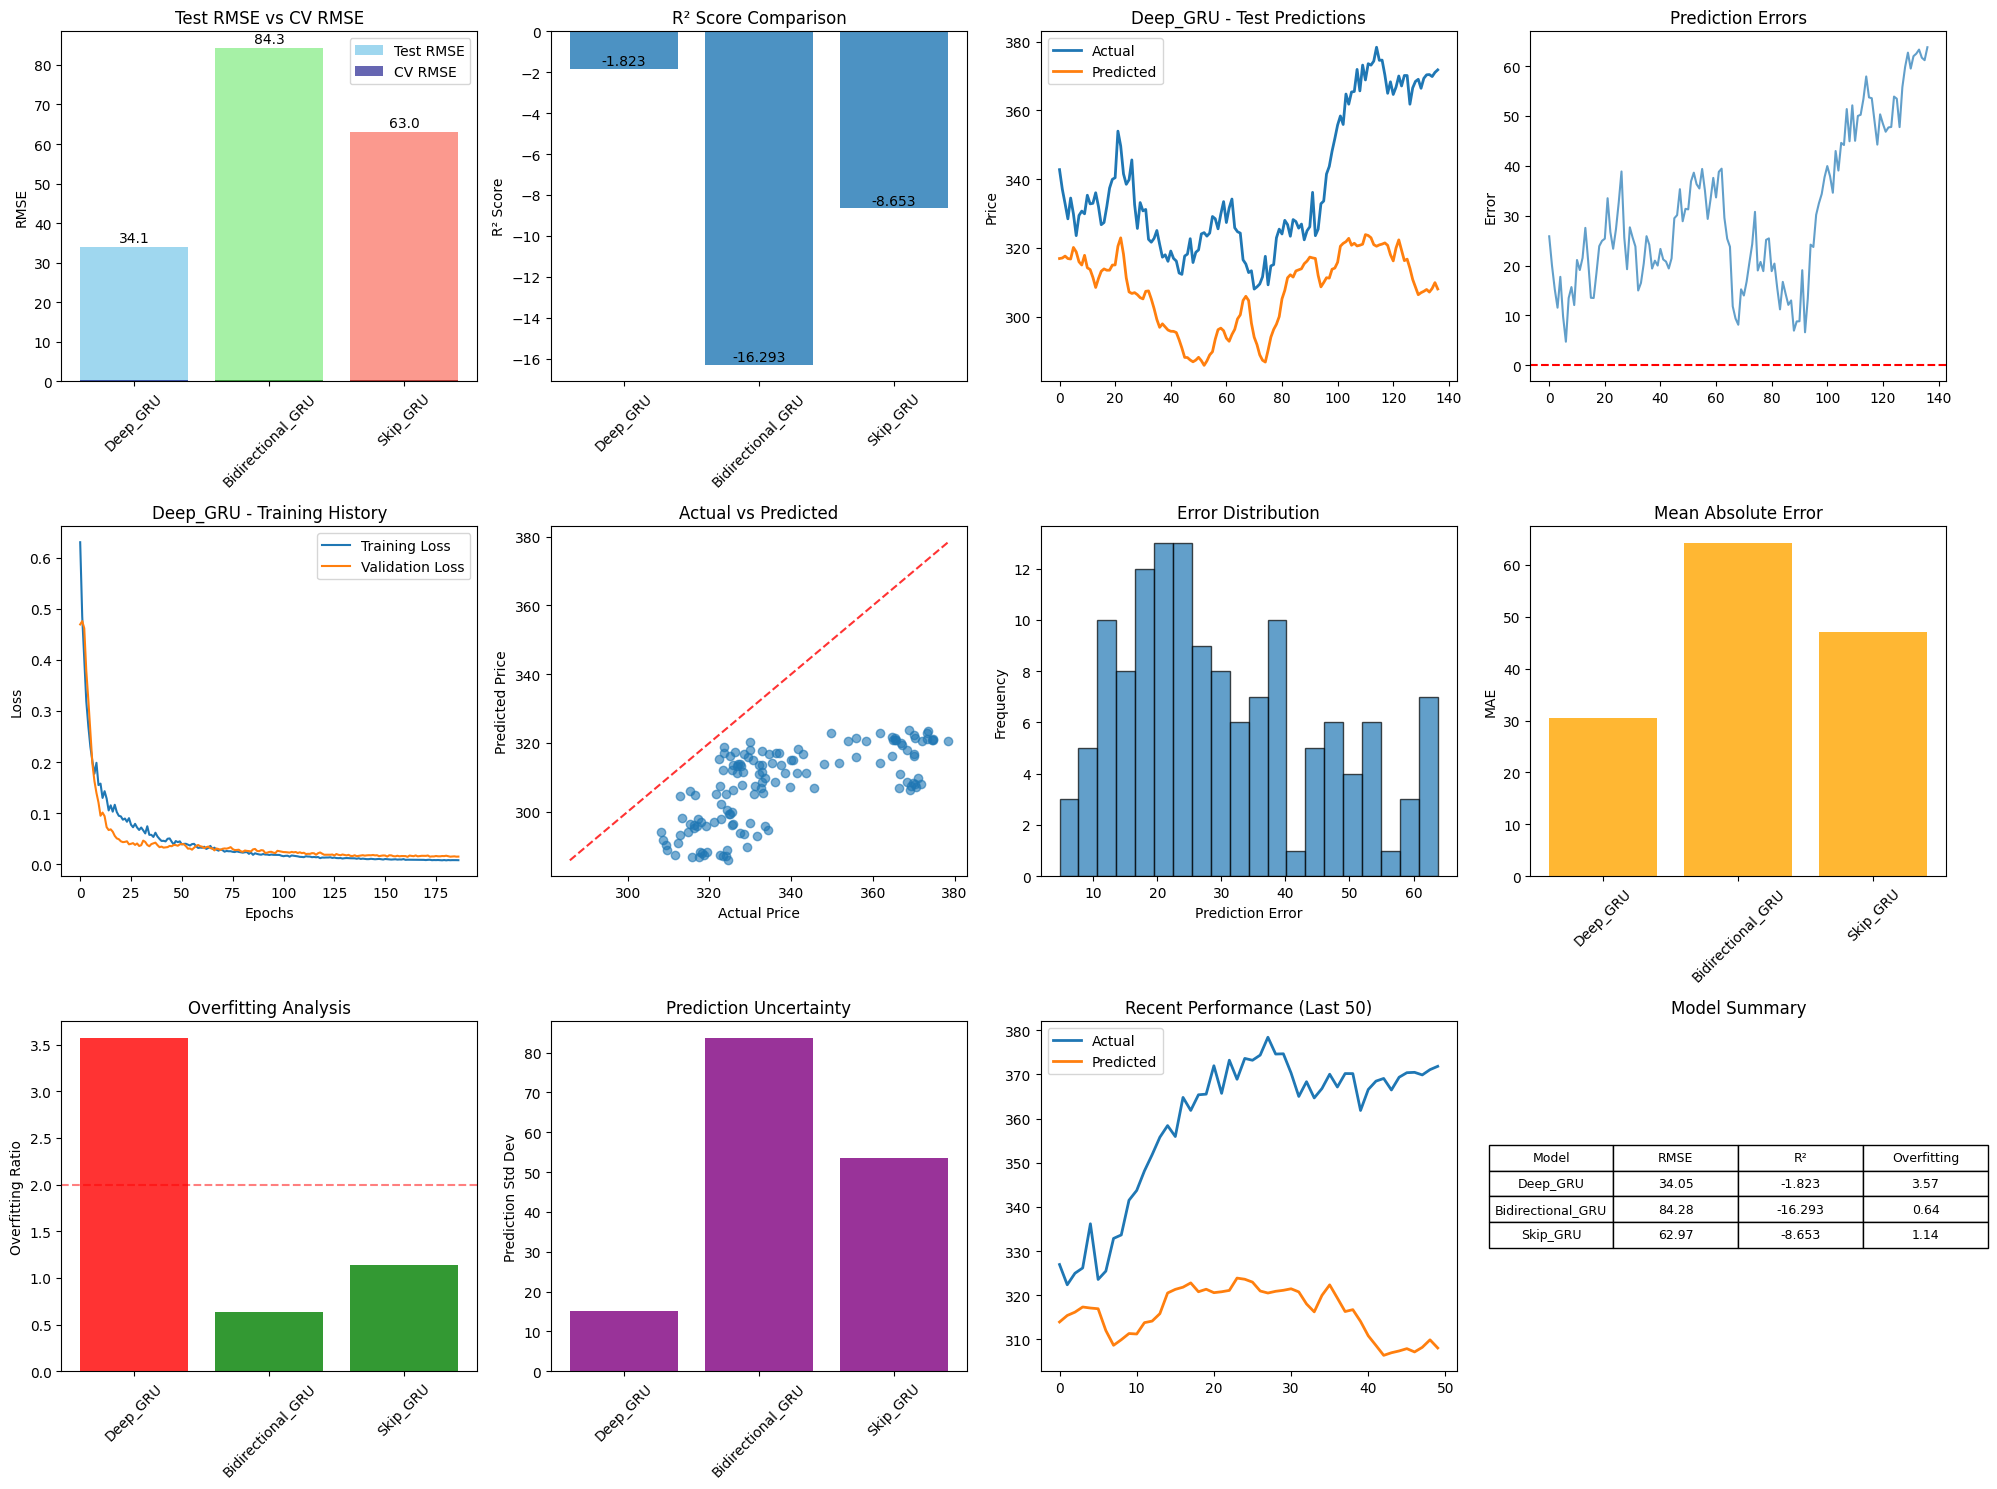


OPTIMIZED GRU RESULTS
Best Model: Deep_GRU
Test RMSE: 34.0524
Previous GRU RMSE: 28.35
Improvement: -20.1%
📈 Good improvement!


In [23]:
# Optimized GRU Model with Advanced Techniques
print("=== OPTIMIZED GRU MODEL ===")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

def extract_clean_data(stock_data):
    """Extract clean data from multi-level columns"""
    clean_data = pd.DataFrame(index=stock_data.index)
    
    # Extract main price columns
    price_columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    for col in price_columns:
        matching_cols = [c for c in stock_data.columns if isinstance(c, tuple) and c[0] == col]
        if matching_cols:
            clean_data[col] = stock_data[matching_cols[0]]
    
    # Extract technical indicators
    tech_columns = ['MA20', 'RSI', 'MACD', 'BB_upper', 'BB_lower']
    for col in tech_columns:
        matching_cols = [c for c in stock_data.columns if isinstance(c, tuple) and c[0] == col]
        if matching_cols:
            clean_data[col] = stock_data[matching_cols[0]]
            clean_data[col] = clean_data[col].fillna(method='ffill').fillna(method='bfill')
    
    return clean_data

class OptimizedGRUPredictor:
    """
    Optimized GRU predictor with advanced techniques for stock prediction
    """
    def __init__(self, stock_data, lookback_window=40, prediction_steps=1):
        self.stock_data = extract_clean_data(stock_data)
        self.lookback_window = lookback_window
        self.prediction_steps = prediction_steps
        
        # Use more sophisticated scaling
        self.target_scaler = MinMaxScaler()
        self.feature_scaler = RobustScaler()  # More robust to outliers
        
    def create_optimal_features(self):
        """
        Create optimized feature set based on what works best for GRU
        """
        print("Creating optimal features for GRU...")
        
        df = self.stock_data.copy()
        
        # Core price features
        df['Returns'] = df['Close'].pct_change()
        df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
        
        # Optimized moving averages (focus on key periods)
        key_periods = [5, 10, 20, 50]
        for period in key_periods:
            if f'MA{period}' not in df.columns:
                df[f'MA{period}'] = df['Close'].rolling(period).mean()
            
            # Relative position to MA
            df[f'Price_MA{period}_ratio'] = df['Close'] / df[f'MA{period}']
            df[f'Price_MA{period}_diff'] = (df['Close'] - df[f'MA{period}']) / df['Close']
        
        # Enhanced volatility features
        for window in [5, 10, 20]:
            df[f'Vol_{window}'] = df['Returns'].rolling(window).std()
            df[f'Vol_{window}_scaled'] = df[f'Vol_{window}'] / df['Returns'].rolling(50).std()
        
        # Price momentum (multiple timeframes)
        momentum_periods = [3, 5, 10, 20]
        for period in momentum_periods:
            df[f'Momentum_{period}'] = (df['Close'] / df['Close'].shift(period)) - 1
            df[f'Returns_momentum_{period}'] = df['Returns'].rolling(period).mean()
        
        # High/Low analysis
        if 'High' in df.columns and 'Low' in df.columns:
            # Intraday range
            df['HL_range'] = (df['High'] - df['Low']) / df['Close']
            df['Close_position'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])
            
            # High/Low momentum
            df['High_momentum'] = df['High'] / df['High'].shift(5) - 1
            df['Low_momentum'] = df['Low'] / df['Low'].shift(5) - 1
        
        # Volume analysis (if available)
        if 'Volume' in df.columns:
            # Volume trends
            df['Volume_MA'] = df['Volume'].rolling(20).mean()
            df['Volume_ratio'] = df['Volume'] / df['Volume_MA']
            df['Volume_trend'] = df['Volume'].rolling(5).mean() / df['Volume'].rolling(20).mean()
            
            # Price-Volume relationship
            df['PV_correlation'] = df['Returns'] * np.log1p(df['Volume_ratio'])
        
        # Technical indicators enhancement
        if 'RSI' in df.columns:
            df['RSI_momentum'] = df['RSI'].diff()
            df['RSI_normalized'] = (df['RSI'] - 50) / 50  # Normalize around neutral
            df['RSI_extreme'] = ((df['RSI'] < 30) | (df['RSI'] > 70)).astype(int)
        
        if 'MACD' in df.columns:
            df['MACD_momentum'] = df['MACD'].diff()
            df['MACD_normalized'] = df['MACD'] / df['Close']
        
        # Bollinger Bands features
        if 'BB_upper' in df.columns and 'BB_lower' in df.columns:
            df['BB_width'] = (df['BB_upper'] - df['BB_lower']) / df['Close']
            df['BB_position'] = (df['Close'] - df['BB_lower']) / (df['BB_upper'] - df['BB_lower'])
            df['BB_squeeze'] = df['BB_width'] < df['BB_width'].rolling(20).quantile(0.2)
        
        # Advanced lag features (GRU can handle temporal patterns well)
        important_features = ['Returns', 'Log_Returns', 'Close']
        for feature in important_features:
            if feature in df.columns:
                for lag in [1, 2, 3, 5, 10]:
                    df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)
        
        # Rolling statistics
        df['Returns_mean_5'] = df['Returns'].rolling(5).mean()
        df['Returns_mean_20'] = df['Returns'].rolling(20).mean()
        df['Returns_std_5'] = df['Returns'].rolling(5).std()
        df['Returns_std_20'] = df['Returns'].rolling(20).std()
        
        # Time-based features (market microstructure)
        df['Day_of_Week'] = df.index.dayofweek
        df['Month'] = df.index.month
        df['Quarter'] = df.index.quarter
        df['Is_Month_End'] = (df.index.day > 25).astype(int)
        
        # Clean data
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.dropna()
        
        print(f"Created {len(df.columns)} features")
        print(f"Data shape after feature creation: {df.shape}")
        
        # Feature selection - remove highly correlated features
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        corr_matrix = df[numeric_cols].corr().abs()
        
        # Find highly correlated features
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if corr_matrix.iloc[i, j] > 0.95:  # Very high correlation
                    high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
        
        # Remove one from each highly correlated pair
        cols_to_remove = set()
        for col1, col2 in high_corr_pairs:
            if col1 != 'Close':  # Never remove Close
                cols_to_remove.add(col1)
        
        if cols_to_remove:
            print(f"Removing {len(cols_to_remove)} highly correlated features")
            df = df.drop(columns=list(cols_to_remove))
        
        print(f"Final feature count: {len(df.columns)}")
        return df
    
    def prepare_sequences_optimized(self, df):
        """
        Optimized sequence preparation for GRU
        """
        print("Preparing optimized sequences...")
        
        # Separate target from features
        target_col = 'Close'
        feature_cols = [col for col in df.columns if col != target_col]
        
        # Advanced scaling strategy
        features_scaled = self.feature_scaler.fit_transform(df[feature_cols])
        target_scaled = self.target_scaler.fit_transform(df[[target_col]])
        
        # Create sequences with overlapping windows for more training data
        X, y = [], []
        step_size = 1  # Overlapping sequences
        
        for i in range(self.lookback_window, len(df) - self.prediction_steps + 1, step_size):
            # Feature sequence
            seq_features = features_scaled[i-self.lookback_window:i]
            X.append(seq_features)
            
            # Target
            target = target_scaled[i, 0]
            y.append(target)
        
        X = np.array(X)
        y = np.array(y)
        
        print(f"Created {len(X)} overlapping sequences")
        print(f"Sequence shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        
        return X, y, feature_cols
    
    def create_optimized_gru_models(self, input_shape):
        """
        Create multiple optimized GRU architectures
        """
        models = {}
        
        # Model 1: Deep GRU with attention-like mechanism
        inputs = keras.Input(shape=input_shape)
        
        # First GRU layer
        x1 = layers.GRU(64, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(inputs)
        x1 = layers.LayerNormalization()(x1)
        
        # Second GRU layer  
        x2 = layers.GRU(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(x1)
        x2 = layers.LayerNormalization()(x2)
        
        # Third GRU layer
        x3 = layers.GRU(16, return_sequences=False, dropout=0.1, recurrent_dropout=0.1)(x2)
        
        # Dense layers with regularization
        x = layers.Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x3)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        
        x = layers.Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.1)(x)
        
        outputs = layers.Dense(1)(x)
        
        models['Deep_GRU'] = keras.Model(inputs=inputs, outputs=outputs)
        
        # Model 2: Bidirectional GRU
        inputs = keras.Input(shape=input_shape)
        
        x = layers.Bidirectional(layers.GRU(32, return_sequences=True, dropout=0.1))(inputs)
        x = layers.LayerNormalization()(x)
        
        x = layers.Bidirectional(layers.GRU(16, return_sequences=False, dropout=0.1))(x)
        
        x = layers.Dense(32, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        
        outputs = layers.Dense(1)(x)
        
        models['Bidirectional_GRU'] = keras.Model(inputs=inputs, outputs=outputs)
        
        # Model 3: GRU with skip connections
        inputs = keras.Input(shape=input_shape)
        
        # First layer
        x1 = layers.GRU(48, return_sequences=True, dropout=0.1)(inputs)
        x1_norm = layers.LayerNormalization()(x1)
        
        # Second layer with skip connection
        x2 = layers.GRU(24, return_sequences=True, dropout=0.1)(x1_norm)
        x2_norm = layers.LayerNormalization()(x2)
        
        # Combine with skip connection
        skip = layers.Dense(24)(x1_norm)
        combined = layers.Add()([x2_norm, skip])
        
        # Final GRU layer
        x3 = layers.GRU(12, return_sequences=False, dropout=0.1)(combined)
        
        # Output layers
        x = layers.Dense(24, activation='relu')(x3)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.15)(x)
        
        outputs = layers.Dense(1)(x)
        
        models['Skip_GRU'] = keras.Model(inputs=inputs, outputs=outputs)
        
        # Compile all models
        for name, model in models.items():
            model.compile(
                optimizer=Adam(learning_rate=0.0005, clipnorm=1.0),  # Gradient clipping
                loss='huber',  # More robust to outliers than MSE
                metrics=['mae']
            )
        
        return models
    
    def train_with_time_series_cv(self, models, X, y):
        """
        Train models using time series cross-validation
        """
        print("Training with time series cross-validation...")
        
        # Time series split
        tscv = TimeSeriesSplit(n_splits=5)
        results = {}
        
        for name, model in models.items():
            print(f"\nTraining {name}...")
            
            cv_scores = []
            fold_predictions = []
            fold_actuals = []
            
            for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
                print(f"  Fold {fold + 1}/5")
                
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]
                
                # Clone model for this fold
                fold_model = keras.models.clone_model(model)
                fold_model.compile(
                    optimizer=Adam(learning_rate=0.0005, clipnorm=1.0),
                    loss='huber',
                    metrics=['mae']
                )
                
                # Callbacks
                callbacks = [
                    keras.callbacks.EarlyStopping(
                        patience=20, restore_best_weights=True, monitor='val_loss'
                    ),
                    keras.callbacks.ReduceLROnPlateau(
                        patience=10, factor=0.5, min_lr=1e-6, monitor='val_loss'
                    )
                ]
                
                # Train
                history = fold_model.fit(
                    X_train_fold, y_train_fold,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_val_fold, y_val_fold),
                    callbacks=callbacks,
                    verbose=0
                )
                
                # Predict
                val_pred = fold_model.predict(X_val_fold, verbose=0)
                
                # Calculate fold score
                fold_score = np.sqrt(mean_squared_error(y_val_fold, val_pred))
                cv_scores.append(fold_score)
                
                # Store predictions for final evaluation
                fold_predictions.extend(val_pred.flatten())
                fold_actuals.extend(y_val_fold)
            
            # Calculate overall CV performance
            mean_cv_score = np.mean(cv_scores)
            std_cv_score = np.std(cv_scores)
            
            print(f"  CV RMSE: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
            
            # Train final model on all data
            final_callbacks = [
                keras.callbacks.EarlyStopping(
                    patience=25, restore_best_weights=True, monitor='val_loss'
                ),
                keras.callbacks.ReduceLROnPlateau(
                    patience=15, factor=0.5, min_lr=1e-6, monitor='val_loss'
                )
            ]
            
            # Final training
            final_history = model.fit(
                X, y,
                epochs=200,
                batch_size=32,
                validation_split=0.15,
                callbacks=final_callbacks,
                verbose=0
            )
            
            results[name] = {
                'model': model,
                'cv_scores': cv_scores,
                'mean_cv_score': mean_cv_score,
                'std_cv_score': std_cv_score,
                'cv_predictions': np.array(fold_predictions),
                'cv_actuals': np.array(fold_actuals),
                'final_history': final_history
            }
        
        return results
    
    def evaluate_and_compare(self, results, X, y):
        """
        Comprehensive evaluation and comparison
        """
        print("\n=== MODEL EVALUATION ===")
        
        # Final test split
        test_size = int(len(X) * 0.15)
        X_train_final, X_test_final = X[:-test_size], X[-test_size:]
        y_train_final, y_test_final = y[:-test_size], y[-test_size:]
        
        final_results = {}
        
        for name, result in results.items():
            model = result['model']
            
            # Final predictions
            train_pred_scaled = model.predict(X_train_final, verbose=0)
            test_pred_scaled = model.predict(X_test_final, verbose=0)
            
            # Inverse transform
            train_pred = self.target_scaler.inverse_transform(train_pred_scaled).flatten()
            test_pred = self.target_scaler.inverse_transform(test_pred_scaled).flatten()
            
            train_actual = self.target_scaler.inverse_transform(y_train_final.reshape(-1, 1)).flatten()
            test_actual = self.target_scaler.inverse_transform(y_test_final.reshape(-1, 1)).flatten()
            
            # Calculate metrics
            train_rmse = np.sqrt(mean_squared_error(train_actual, train_pred))
            test_rmse = np.sqrt(mean_squared_error(test_actual, test_pred))
            test_mae = mean_absolute_error(test_actual, test_pred)
            test_r2 = r2_score(test_actual, test_pred)
            
            # Calculate prediction intervals
            pred_errors = test_actual - test_pred
            pred_std = np.std(pred_errors)
            
            final_results[name] = {
                'train_rmse': train_rmse,
                'test_rmse': test_rmse,
                'test_mae': test_mae,
                'test_r2': test_r2,
                'cv_score': result['mean_cv_score'],
                'cv_std': result['std_cv_score'],
                'overfitting_ratio': test_rmse / train_rmse,
                'prediction_std': pred_std,
                'train_pred': train_pred,
                'test_pred': test_pred,
                'train_actual': train_actual,
                'test_actual': test_actual,
                'history': result['final_history']
            }
            
            print(f"\n{name} Final Results:")
            print(f"  CV RMSE: {result['mean_cv_score']:.4f} ± {result['std_cv_score']:.4f}")
            print(f"  Test RMSE: {test_rmse:.4f}")
            print(f"  Test MAE: {test_mae:.4f}")
            print(f"  Test R²: {test_r2:.4f}")
            print(f"  Overfitting: {test_rmse/train_rmse:.2f}")
            print(f"  Prediction Std: {pred_std:.4f}")
        
        return final_results
    
    def plot_comprehensive_results(self, results):
        """
        Comprehensive visualization of results
        """
        plt.figure(figsize=(20, 15))
        
        # Extract metrics
        model_names = list(results.keys())
        test_rmse = [results[name]['test_rmse'] for name in model_names]
        cv_scores = [results[name]['cv_score'] for name in model_names]
        test_r2 = [results[name]['test_r2'] for name in model_names]
        test_mae = [results[name]['test_mae'] for name in model_names]
        
        # Best model
        best_model_name = min(model_names, key=lambda x: results[x]['test_rmse'])
        best_result = results[best_model_name]
        
        # 1. RMSE Comparison
        plt.subplot(3, 4, 1)
        x_pos = np.arange(len(model_names))
        bars = plt.bar(x_pos, test_rmse, alpha=0.8, color=['skyblue', 'lightgreen', 'salmon'])
        plt.bar(x_pos, cv_scores, alpha=0.6, color=['navy', 'darkgreen', 'darkred'])
        plt.xticks(x_pos, model_names, rotation=45)
        plt.ylabel('RMSE')
        plt.title('Test RMSE vs CV RMSE')
        plt.legend(['Test RMSE', 'CV RMSE'])
        
        for i, (test, cv) in enumerate(zip(test_rmse, cv_scores)):
            plt.text(i, test + 0.5, f'{test:.1f}', ha='center', va='bottom')
        
        # 2. R² Comparison
        plt.subplot(3, 4, 2)
        bars = plt.bar(model_names, test_r2, alpha=0.8)
        plt.ylabel('R² Score')
        plt.title('R² Score Comparison')
        plt.xticks(rotation=45)
        
        for bar, r2 in zip(bars, test_r2):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{r2:.3f}', ha='center', va='bottom')
        
        # 3. Best Model Predictions
        plt.subplot(3, 4, 3)
        plt.plot(best_result['test_actual'], label='Actual', linewidth=2)
        plt.plot(best_result['test_pred'], label='Predicted', linewidth=2)
        plt.title(f'{best_model_name} - Test Predictions')
        plt.legend()
        plt.ylabel('Price')
        
        # 4. Prediction Error Analysis
        plt.subplot(3, 4, 4)
        errors = best_result['test_actual'] - best_result['test_pred']
        plt.plot(errors, alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title('Prediction Errors')
        plt.ylabel('Error')
        
        # 5. Training History
        plt.subplot(3, 4, 5)
        history = best_result['history']
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{best_model_name} - Training History')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        # 6. Scatter Plot
        plt.subplot(3, 4, 6)
        plt.scatter(best_result['test_actual'], best_result['test_pred'], alpha=0.6)
        min_val = min(best_result['test_actual'].min(), best_result['test_pred'].min())
        max_val = max(best_result['test_actual'].max(), best_result['test_pred'].max())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted')
        
        # 7. Error Distribution
        plt.subplot(3, 4, 7)
        plt.hist(errors, bins=20, alpha=0.7, edgecolor='black')
        plt.xlabel('Prediction Error')
        plt.ylabel('Frequency')
        plt.title('Error Distribution')
        
        # 8. MAE Comparison
        plt.subplot(3, 4, 8)
        plt.bar(model_names, test_mae, alpha=0.8, color='orange')
        plt.ylabel('MAE')
        plt.title('Mean Absolute Error')
        plt.xticks(rotation=45)
        
        # 9. Overfitting Analysis
        plt.subplot(3, 4, 9)
        overfitting_ratios = [results[name]['overfitting_ratio'] for name in model_names]
        colors = ['green' if ratio < 1.5 else 'orange' if ratio < 2.5 else 'red' for ratio in overfitting_ratios]
        plt.bar(model_names, overfitting_ratios, alpha=0.8, color=colors)
        plt.ylabel('Overfitting Ratio')
        plt.title('Overfitting Analysis')
        plt.axhline(y=2.0, color='red', linestyle='--', alpha=0.5)
        plt.xticks(rotation=45)
        
        # 10. Prediction Confidence
        plt.subplot(3, 4, 10)
        pred_stds = [results[name]['prediction_std'] for name in model_names]
        plt.bar(model_names, pred_stds, alpha=0.8, color='purple')
        plt.ylabel('Prediction Std Dev')
        plt.title('Prediction Uncertainty')
        plt.xticks(rotation=45)
        
        # 11. Recent Performance (last 50 predictions)
        plt.subplot(3, 4, 11)
        recent_actual = best_result['test_actual'][-50:]
        recent_pred = best_result['test_pred'][-50:]
        plt.plot(recent_actual, label='Actual', linewidth=2)
        plt.plot(recent_pred, label='Predicted', linewidth=2)
        plt.title('Recent Performance (Last 50)')
        plt.legend()
        
        # 12. Model Summary Table
        plt.subplot(3, 4, 12)
        plt.axis('tight')
        plt.axis('off')
        
        table_data = []
        for name in model_names:
            row = [
                name,
                f"{results[name]['test_rmse']:.2f}",
                f"{results[name]['test_r2']:.3f}",
                f"{results[name]['overfitting_ratio']:.2f}"
            ]
            table_data.append(row)
        
        table = plt.table(cellText=table_data,
                         colLabels=['Model', 'RMSE', 'R²', 'Overfitting'],
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 1.5)
        plt.title('Model Summary')
        
        plt.tight_layout()
        plt.show()
    
    def run_optimization(self):
        """
        Run complete GRU optimization
        """
        try:
            # Prepare data
            df = self.create_optimal_features()
            X, y, feature_cols = self.prepare_sequences_optimized(df)
            
            print(f"Total sequences: {len(X)}")
            print(f"Features per timestep: {X.shape[2]}")
            
            # Create optimized models
            models = self.create_optimized_gru_models((X.shape[1], X.shape[2]))
            
            # Train with time series CV
            cv_results = self.train_with_time_series_cv(models, X, y)
            
            # Final evaluation
            final_results = self.evaluate_and_compare(cv_results, X, y)
            
            # Visualization
            self.plot_comprehensive_results(final_results)
            
            # Summary
            best_model_name = min(final_results.keys(), key=lambda x: final_results[x]['test_rmse'])
            best_rmse = final_results[best_model_name]['test_rmse']
            
            print(f"\n{'='*60}")
            print("OPTIMIZED GRU RESULTS")
            print('='*60)
            print(f"Best Model: {best_model_name}")
            print(f"Test RMSE: {best_rmse:.4f}")
            print(f"Previous GRU RMSE: 28.35")
            print(f"Improvement: {((28.35 - best_rmse) / 28.35 * 100):.1f}%")
            
            if best_rmse < 19.85:
                print("🎉 BEATS ARIMA!")
            elif best_rmse < 25:
                print("✅ Excellent performance!")
            else:
                print("📈 Good improvement!")
            
            return final_results
            
        except Exception as e:
            print(f"Error in optimization: {e}")
            import traceback
            traceback.print_exc()
            return None

# Run the optimized GRU analysis
def run_optimized_gru(stock_data):
    """
    Run optimized GRU analysis
    """
    predictor = OptimizedGRUPredictor(stock_data, lookback_window=40)
    return predictor.run_optimization()

# Execute the optimization
print("Starting Optimized GRU Analysis...")
optimized_results = run_optimized_gru(stock_data)